# Add final to DCC notes under presentation file

In [2]:
import windrose
from windrose import WindroseAxes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gwpy.time import tconvert
from scipy import stats
import seaborn as sns
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300

In [5]:
def Constrain(df1,df2,s,e):
    t_i=to60(s)
    t_f=to60(e)    
    return (df1.merge(df2, left_index=True, right_index=True)).loc[t_i:t_f]

In [6]:
def to60(d):
    t = tconvert(d)
    return (int(t/60)*60)

In [7]:
CSSpeed = pd.read_csv("CS_MPS_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
CSDir = pd.read_csv("CS_DEG_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
EXSpeed = pd.read_csv("EX_MPS_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
EXDir = pd.read_csv("EX_DEG_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
EXRot = pd.read_csv("EX_RY_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
MXSpeed = pd.read_csv("MX_MPS_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
EXFSpeed = pd.read_csv("Speed_2_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
STS_X = pd.read_csv("STS_X_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")
STS_Y = pd.read_csv("STS_Y_ALL.csv").sort_values("Time (GPS)").set_index("Time (GPS)")

In [8]:
df = Constrain(EXSpeed, EXDir,'June 1 1990',"Aug 1 2020")
EXSpeedDirFiltered = EXSpeed.loc[(df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']<135) & (df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']>45)]
EXSpeedOtherDir = EXSpeed.drop(EXSpeedDirFiltered.index)
EXSpeedDirNX = EXSpeed.loc[(df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']<225) & (df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']>135)]
EXSpeedDirY = EXSpeed.loc[(df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']<315) & (df['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']>225)]

df2 = Constrain(CSSpeed, CSDir,'June 1 1990',"Aug 1 2020")
CSSpeedDirFiltered = CSSpeed.loc[df2[(df2['H1:PEM-CS_WIND_ROOF_WEATHER_DEG.mean']<135) & (df2['H1:PEM-CS_WIND_ROOF_WEATHER_DEG.mean']>45)].index]
CSSpeedOtherDir = CSSpeed.drop(CSSpeedDirFiltered.index)

df3 = Constrain(CSSpeed, EXDir,'June 1 1990',"Aug 1 2020")
CSDF = CSSpeed.loc[(df3['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']<135) & (df3['H1:PEM-EX_WIND_ROOF_WEATHER_DEG.mean']>45)]


# Wind Info

In [9]:
def WindRose(starttime,endtime,speeddf,dirdf,binmin,binmax):
    #convert start and end time strings to GPS time rounded to 60
    t_i = to60(starttime)
    t_f = to60(endtime)
    
    #take the intersection of the two indicies (since there may be missing data points or extra parameters placed on one or the other)
    n = sorted(set(dirdf.loc[t_i:t_f].index) & set(speeddf.loc[t_i:t_f].index))
    
    #series consisting of speed/direction values
    wd = dirdf.loc[n].iloc[:,0]
    ws = speeddf.loc[n].iloc[:,0]
    ax = WindroseAxes.from_ax()
    
    #ax.contourf(wd, ws, normed=True,nsector=24,bins=np.arange(binmin, binmax,2))
    ax.bar(wd, ws, normed=True,nsector=20,bins=np.arange(binmin, binmax,2))
    ax.set_xticklabels(['-Y', '', '+X', '', '+Y', '', '-X', ''])
    ax.set_legend()

In [10]:
def CPT(starttime, endtime, speeddf, dirdf):
    t_i = to60(starttime)
    t_f = to60(endtime)

    #take the intersection of the two indicies (since there may be missing data points or extra parameters placed on one or the other)
    n = sorted(set(dirdf.loc[t_i:t_f].index) & set(speeddf.loc[t_i:t_f].index))

    #series consisting of speed/direction values
    wd = dirdf.loc[n].iloc[:,0]
    ws = speeddf.loc[n].iloc[:,0]
    ax = WindroseAxes.from_ax()

    ax.contourf(wd, ws, normed=True,nsector=4,bins=np.arange(0, 24,4))
    df = pd.DataFrame(ax._info['table'], index=["<4m/s","4-8m/s","8-12m/s","12-16m/s","16-20m/s",">20m/s"], columns=["+X","-Y","-X","+Y"])
    df['total']=list(df.sum(axis=1))
    df.loc['total'] = list(df.sum(axis=0))
    return df

Figures in this section will be generated with the following parameters

In [12]:
starttime = "Jan 1 2019 00:00:00"
endtime = "Jan 1 2020 00:00:00"

## End-X

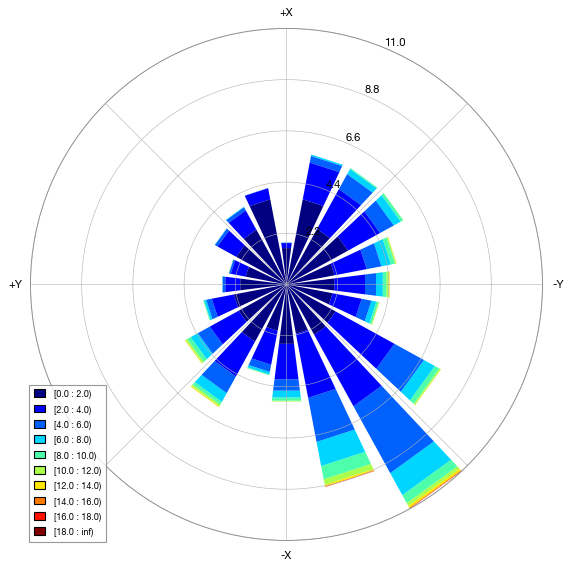

In [19]:
WindRose(starttime, endtime, EXSpeed, EXDir, 0, 20)

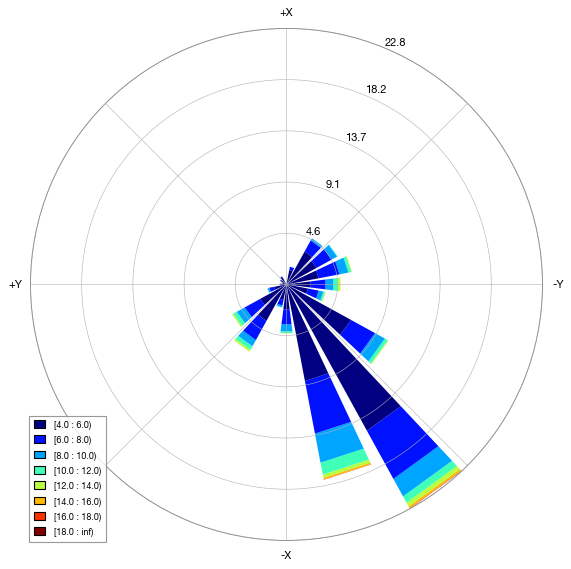

In [20]:
WindRose(starttime, endtime, EXSpeed, EXDir, 4, 20)

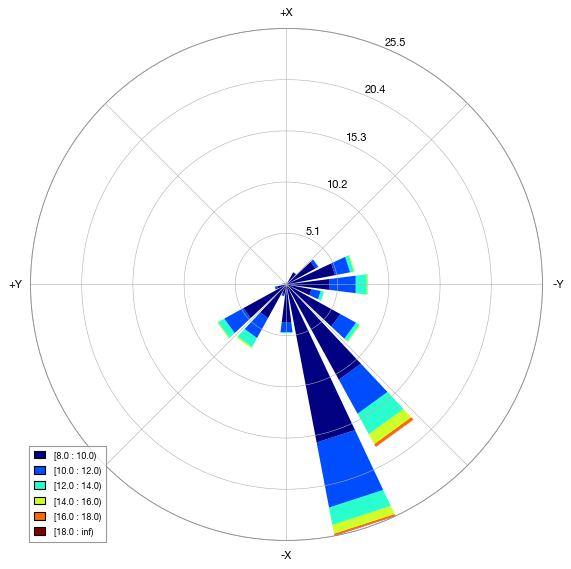

In [28]:
WindRose(starttime, endtime, EXSpeed, EXDir, 8, 20)

In [25]:
%%capture
ProbTableX = CPT(starttime, endtime, EXSpeed, EXDir)

In [26]:
ProbTableX

+X         -Y         -X         +Y       total
<4m/s     19.564332  20.007307  22.985969  15.441319   77.998927
4-8m/s     1.546035   5.451937   9.764470   1.628617   18.391058
8-12m/s    0.062793   1.025235   1.783506   0.311681    3.183214
12-16m/s   0.000381   0.095331   0.267916   0.042052    0.405680
16-20m/s   0.000000   0.000571   0.020170   0.000381    0.021121
>20m/s     0.000000   0.000000   0.000000   0.000000    0.000000
total     21.173540  26.580380  34.822030  17.424049  100.000000

direction indicates the direction the wind is blowing **towards**

-Y is the direction we are protected against

## Corner Station

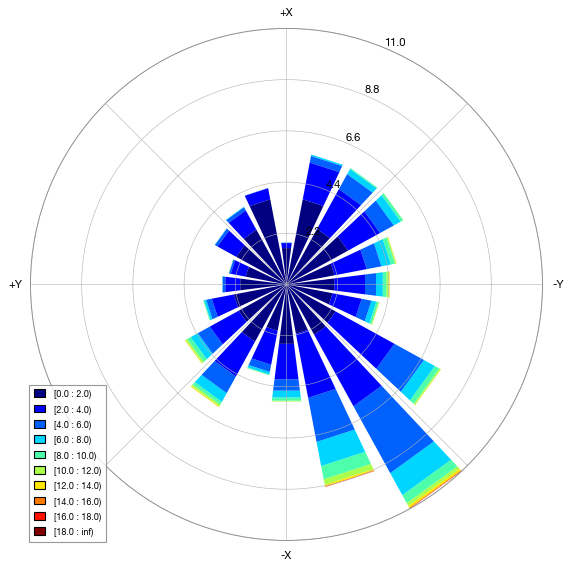

In [29]:
WindRose(starttime, endtime, CSSpeed, CSDir, 0, 20)

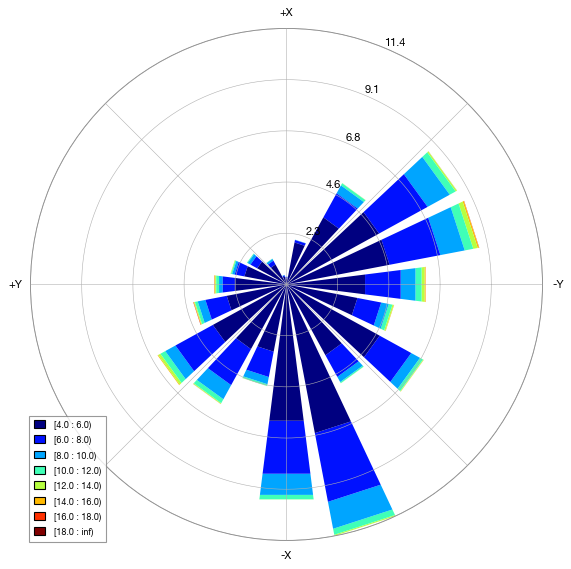

In [30]:
WindRose(starttime, endtime, CSSpeed, CSDir, 4, 20)

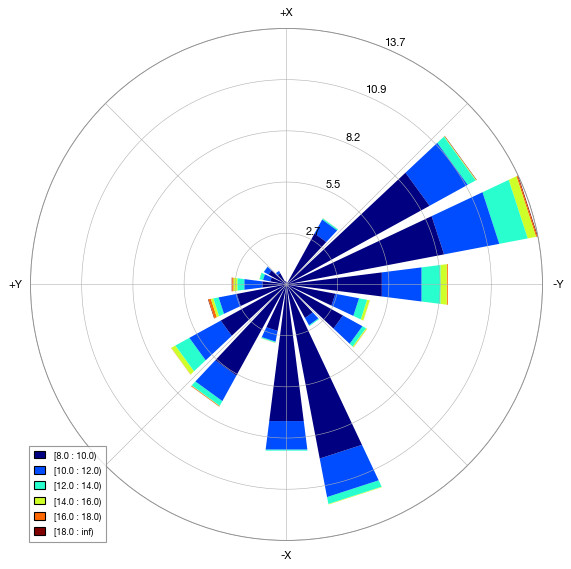

In [32]:
WindRose(starttime, endtime, CSSpeed, CSDir, 8, 20)

At the corner station we see that most high speed wind blows in the -Y direction but at EX we see most high speed wind blowing in the -X direction. This could be due to a variety of factors but we won't have a good sense of what's happening until we can get a free stream sensor installed.

# CS vs EX Wind

In [35]:
starttime1= 'December 15 2018'
endtime1= 'June 1 2019'
starttime2='December 15 2019'
endtime2='May 31 2020'

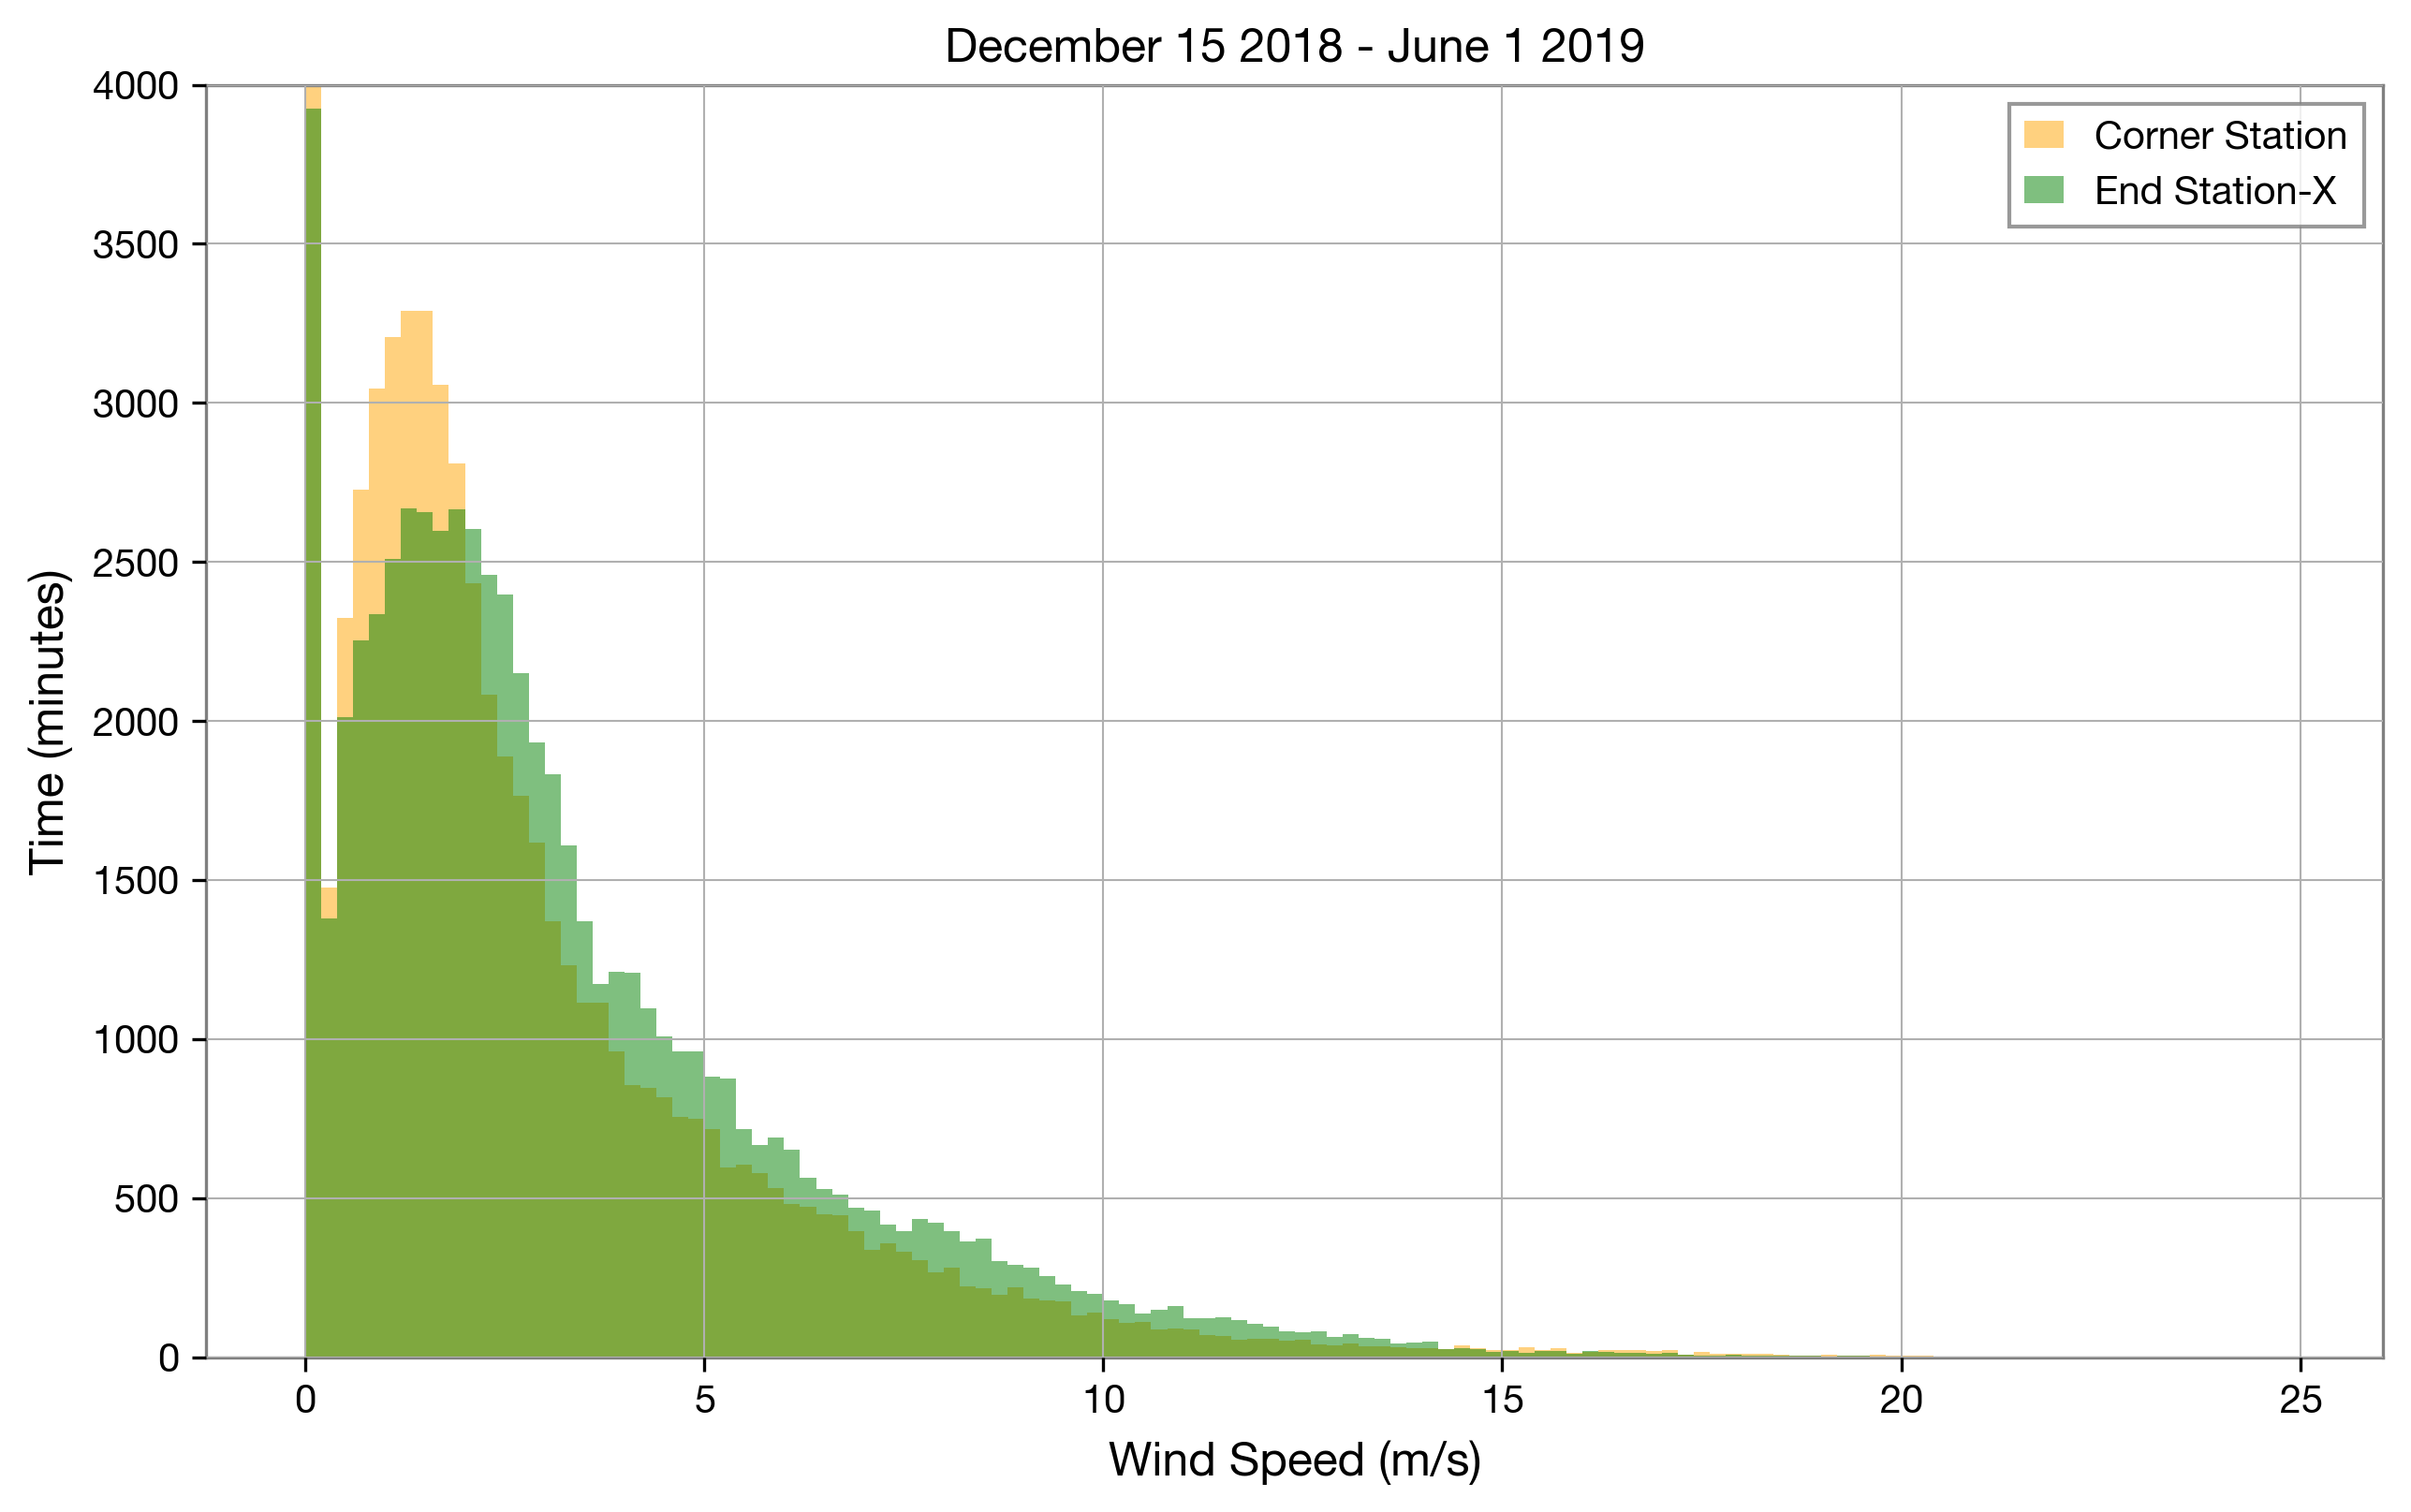

In [88]:
plt.hist(CSDF.loc[to60(starttime1):to60(endtime1)],bins=np.arange(0,25,.2), color = 'orange', alpha=0.5,label = "Corner Station")
plt.hist(EXSpeedDirFiltered.loc[to60(starttime1):to60(endtime1)],bins=np.arange(0,25,.2), color = 'green', alpha=0.5,label="End Station-X")
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.ylim(0,4000)
#plt.yscale('log')
plt.ylabel('Time (minutes)')

plt.legend()
plt.title("December 15 2018 - June 1 2019")
plt.show()

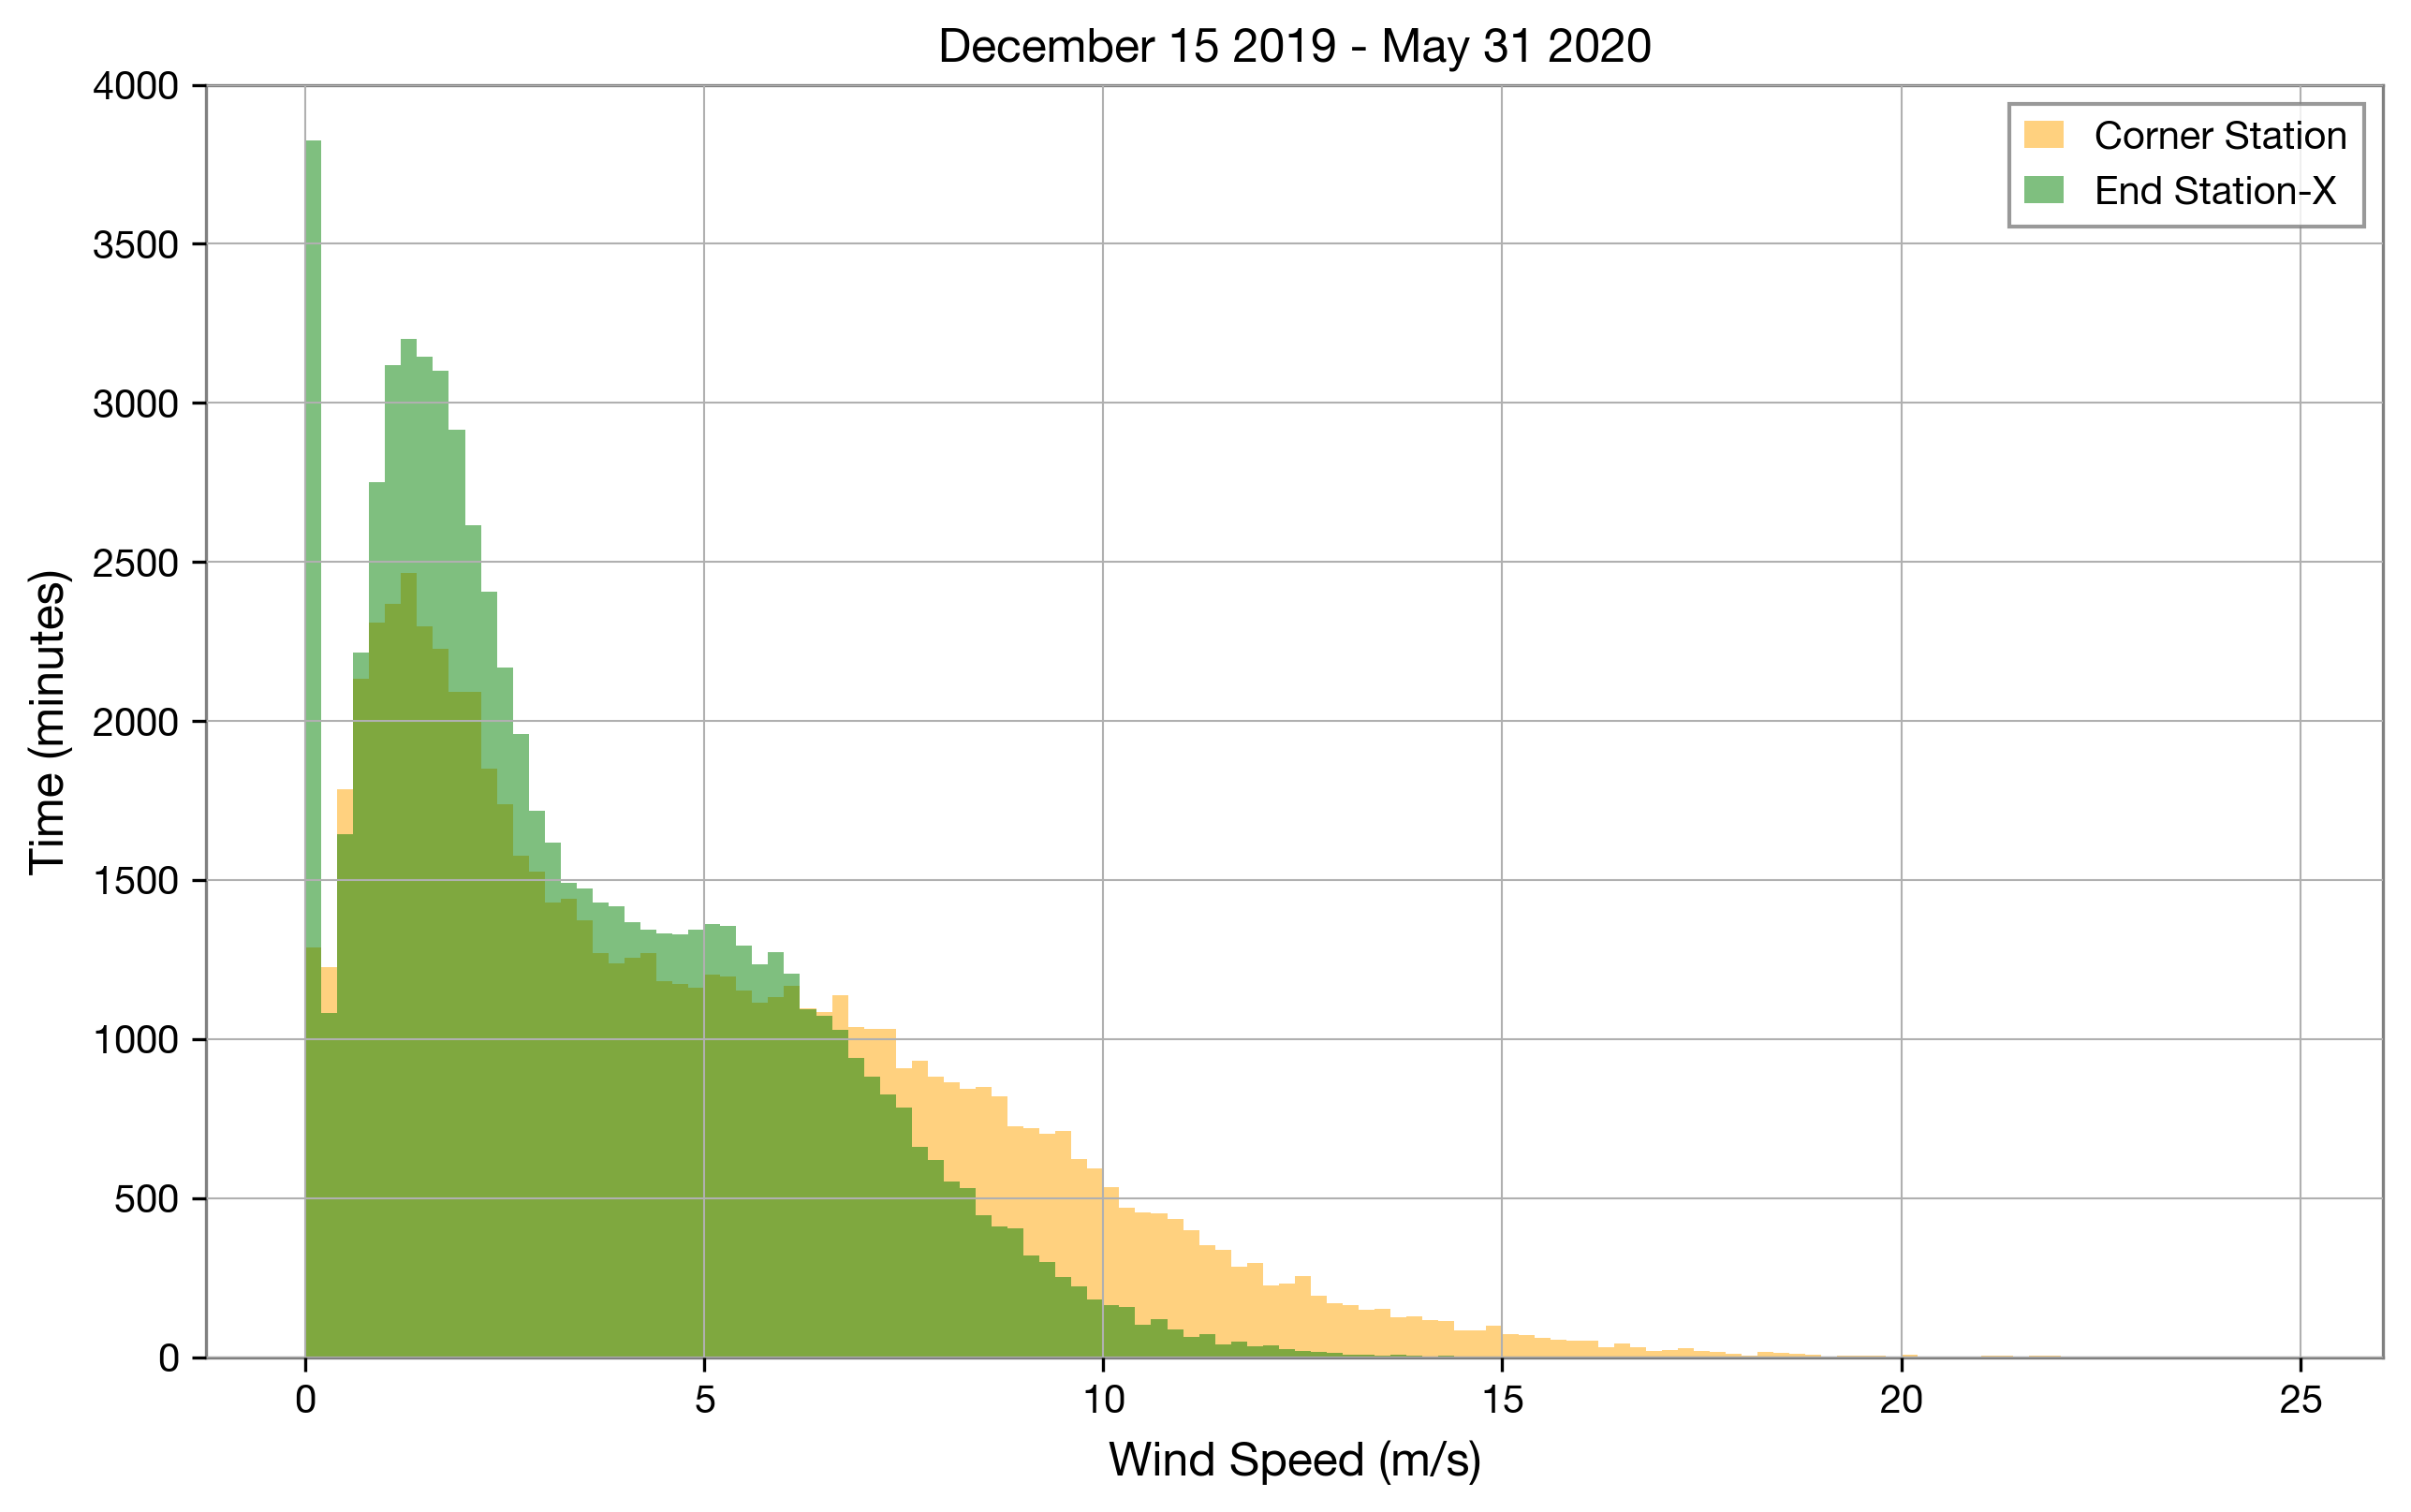

In [90]:
plt.hist(CSDF.loc[to60(starttime2):to60(endtime2)],bins=np.arange(0,25,.2), color = 'orange', alpha=0.5,label = "Corner Station")
plt.hist(EXSpeedDirFiltered.loc[to60(starttime2):to60(endtime2)],bins=np.arange(0,25,.2), color = 'green', alpha=0.5,label="End Station-X")
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Time (minutes)')
#plt.yscale('log')
plt.legend()
plt.ylim(0,4000)

plt.title("December 15 2019 - May 31 2020")
plt.show()

# Looking at Tilt

Text(0.5, 0, 'Wind Speed on Top of End-X (m/s)')

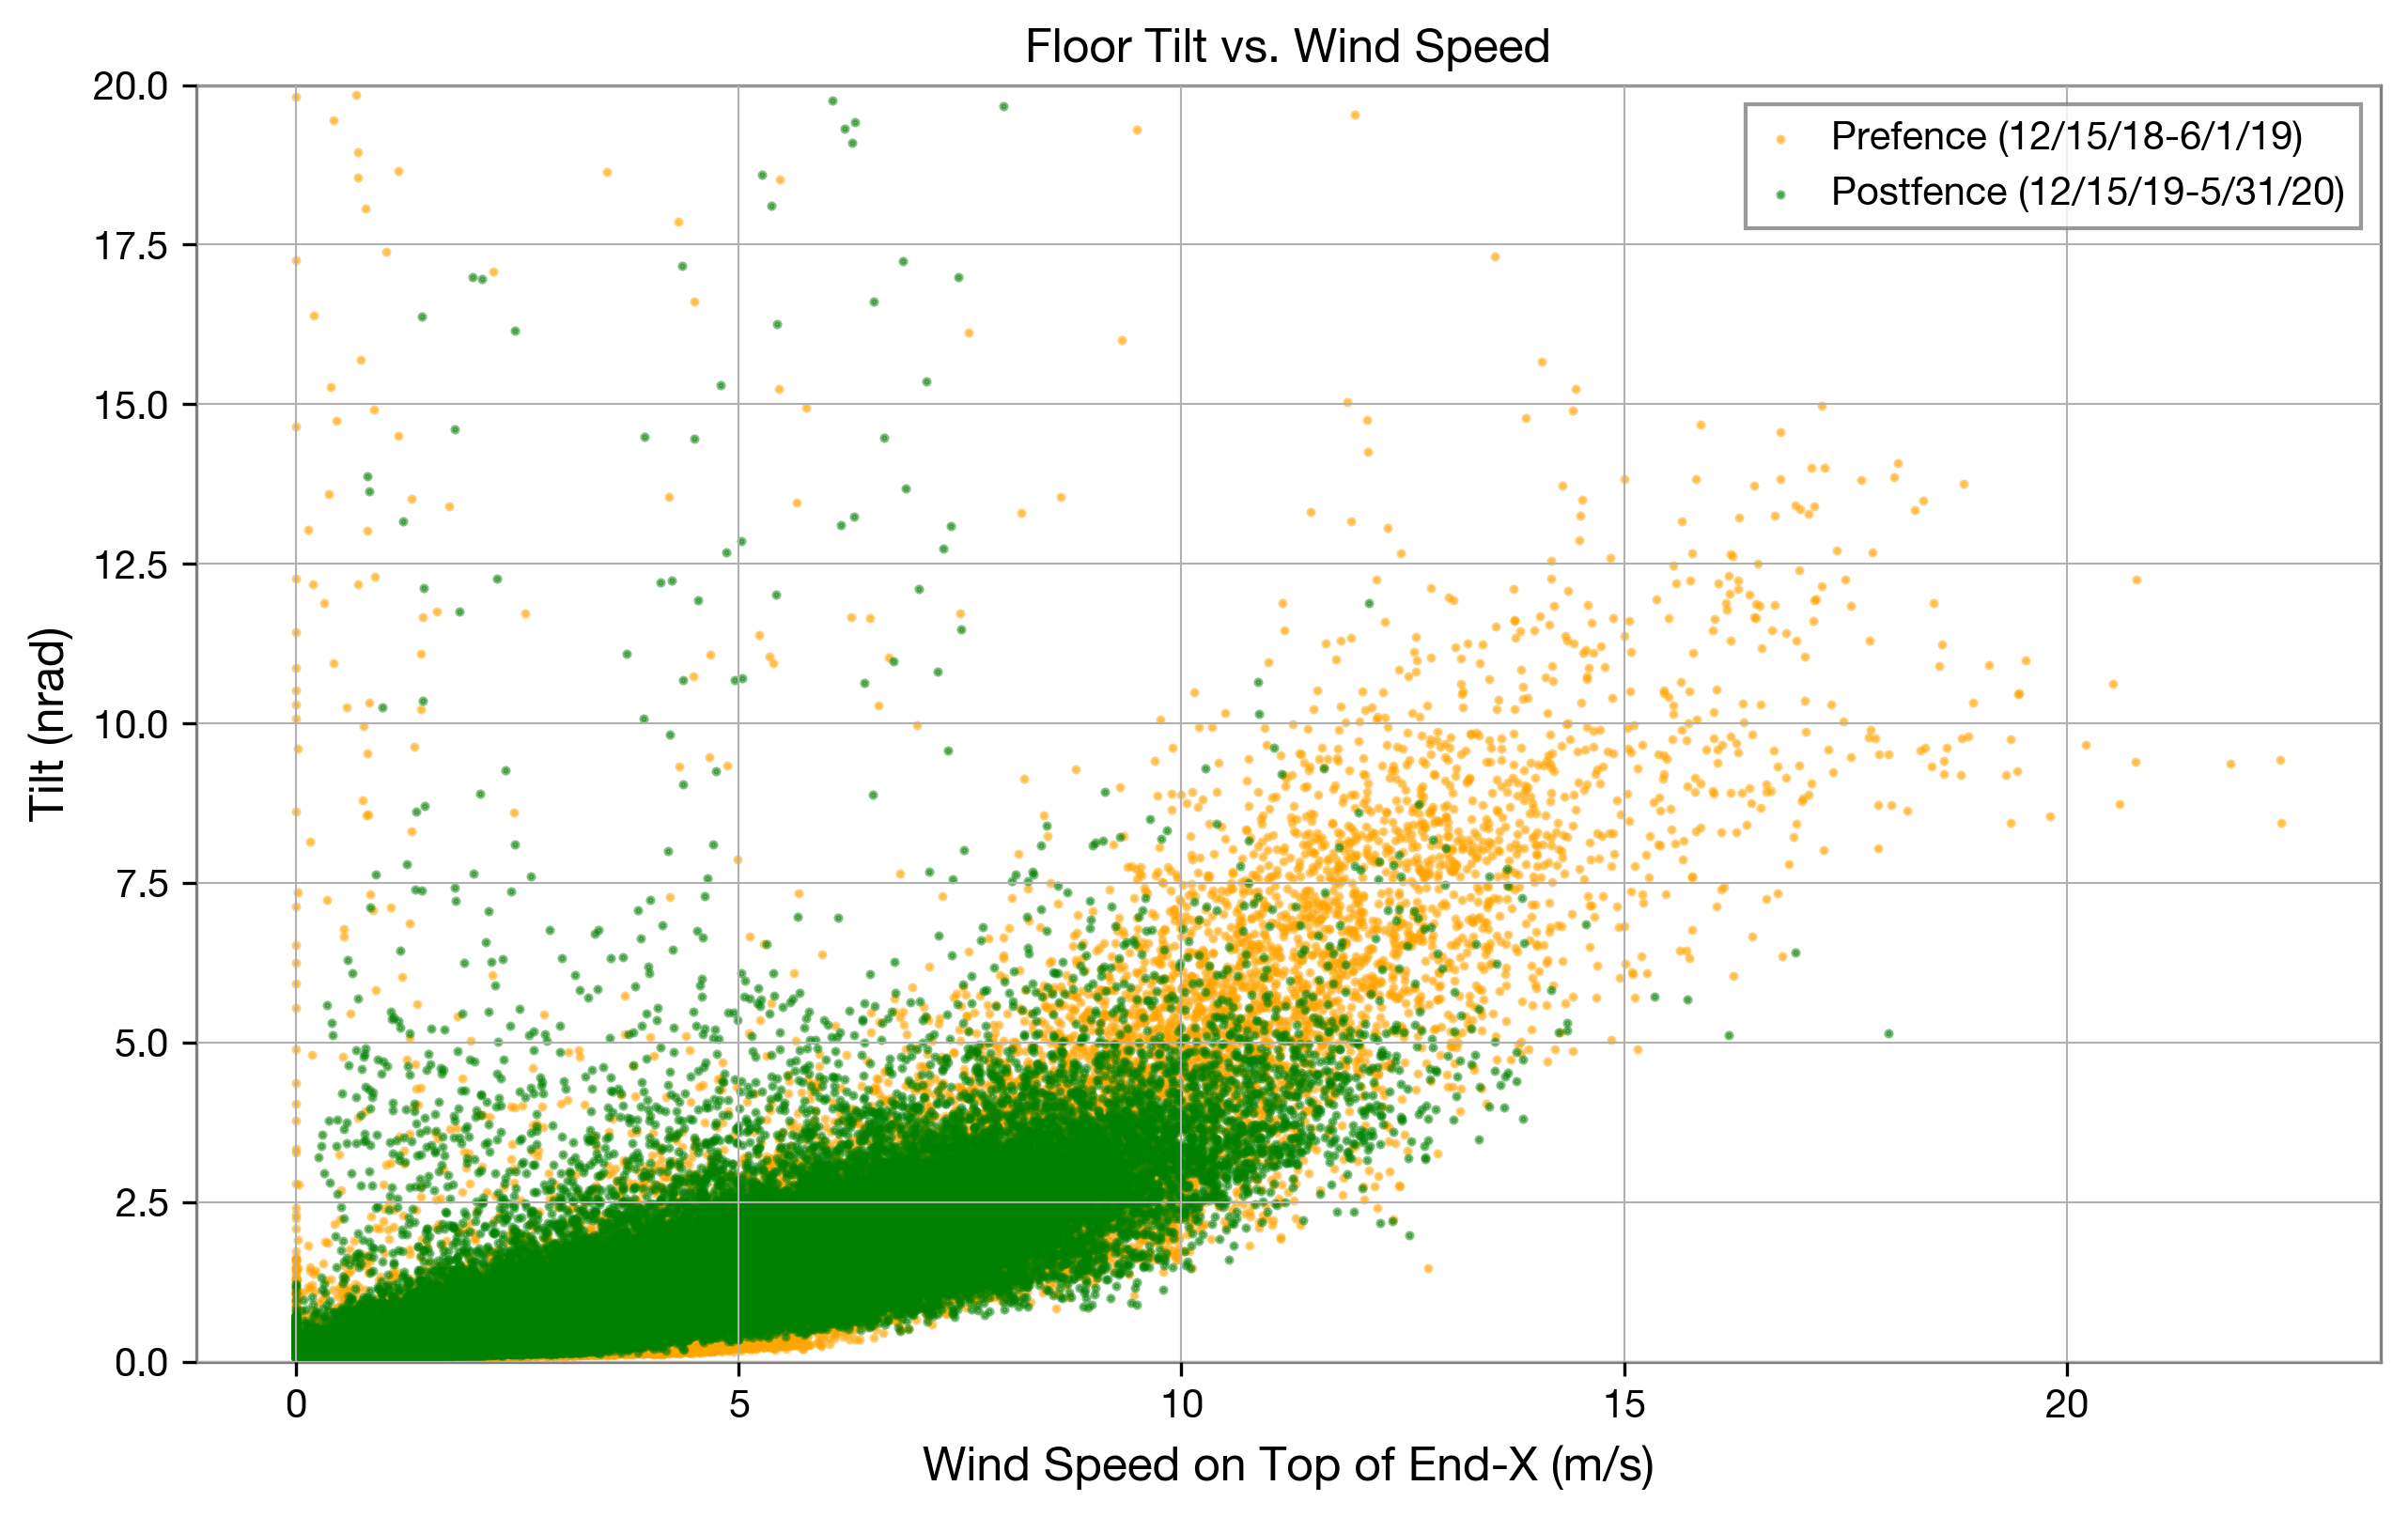

In [85]:
n = sorted(set(EXSpeedDirFiltered.index)&set(EXFSpeed.index))
predf = Constrain(EXSpeed.loc[n],EXRot,starttime1,endtime1)
postdf = Constrain(EXSpeed.loc[n],EXRot,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]

plt.scatter(X1,Y1, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)",s=2)
plt.scatter(X2,Y2, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)",s=2)
plt.ylim(0,20)
plt.legend()
plt.title('Floor Tilt vs. Wind Speed')
plt.ylabel('Tilt (nrad)')
plt.xlabel('Wind Speed on Top of End-X (m/s)')


Text(0.5, 1.0, 'EX Floor Tilt vs. Speed of Wind in -Y Direction')

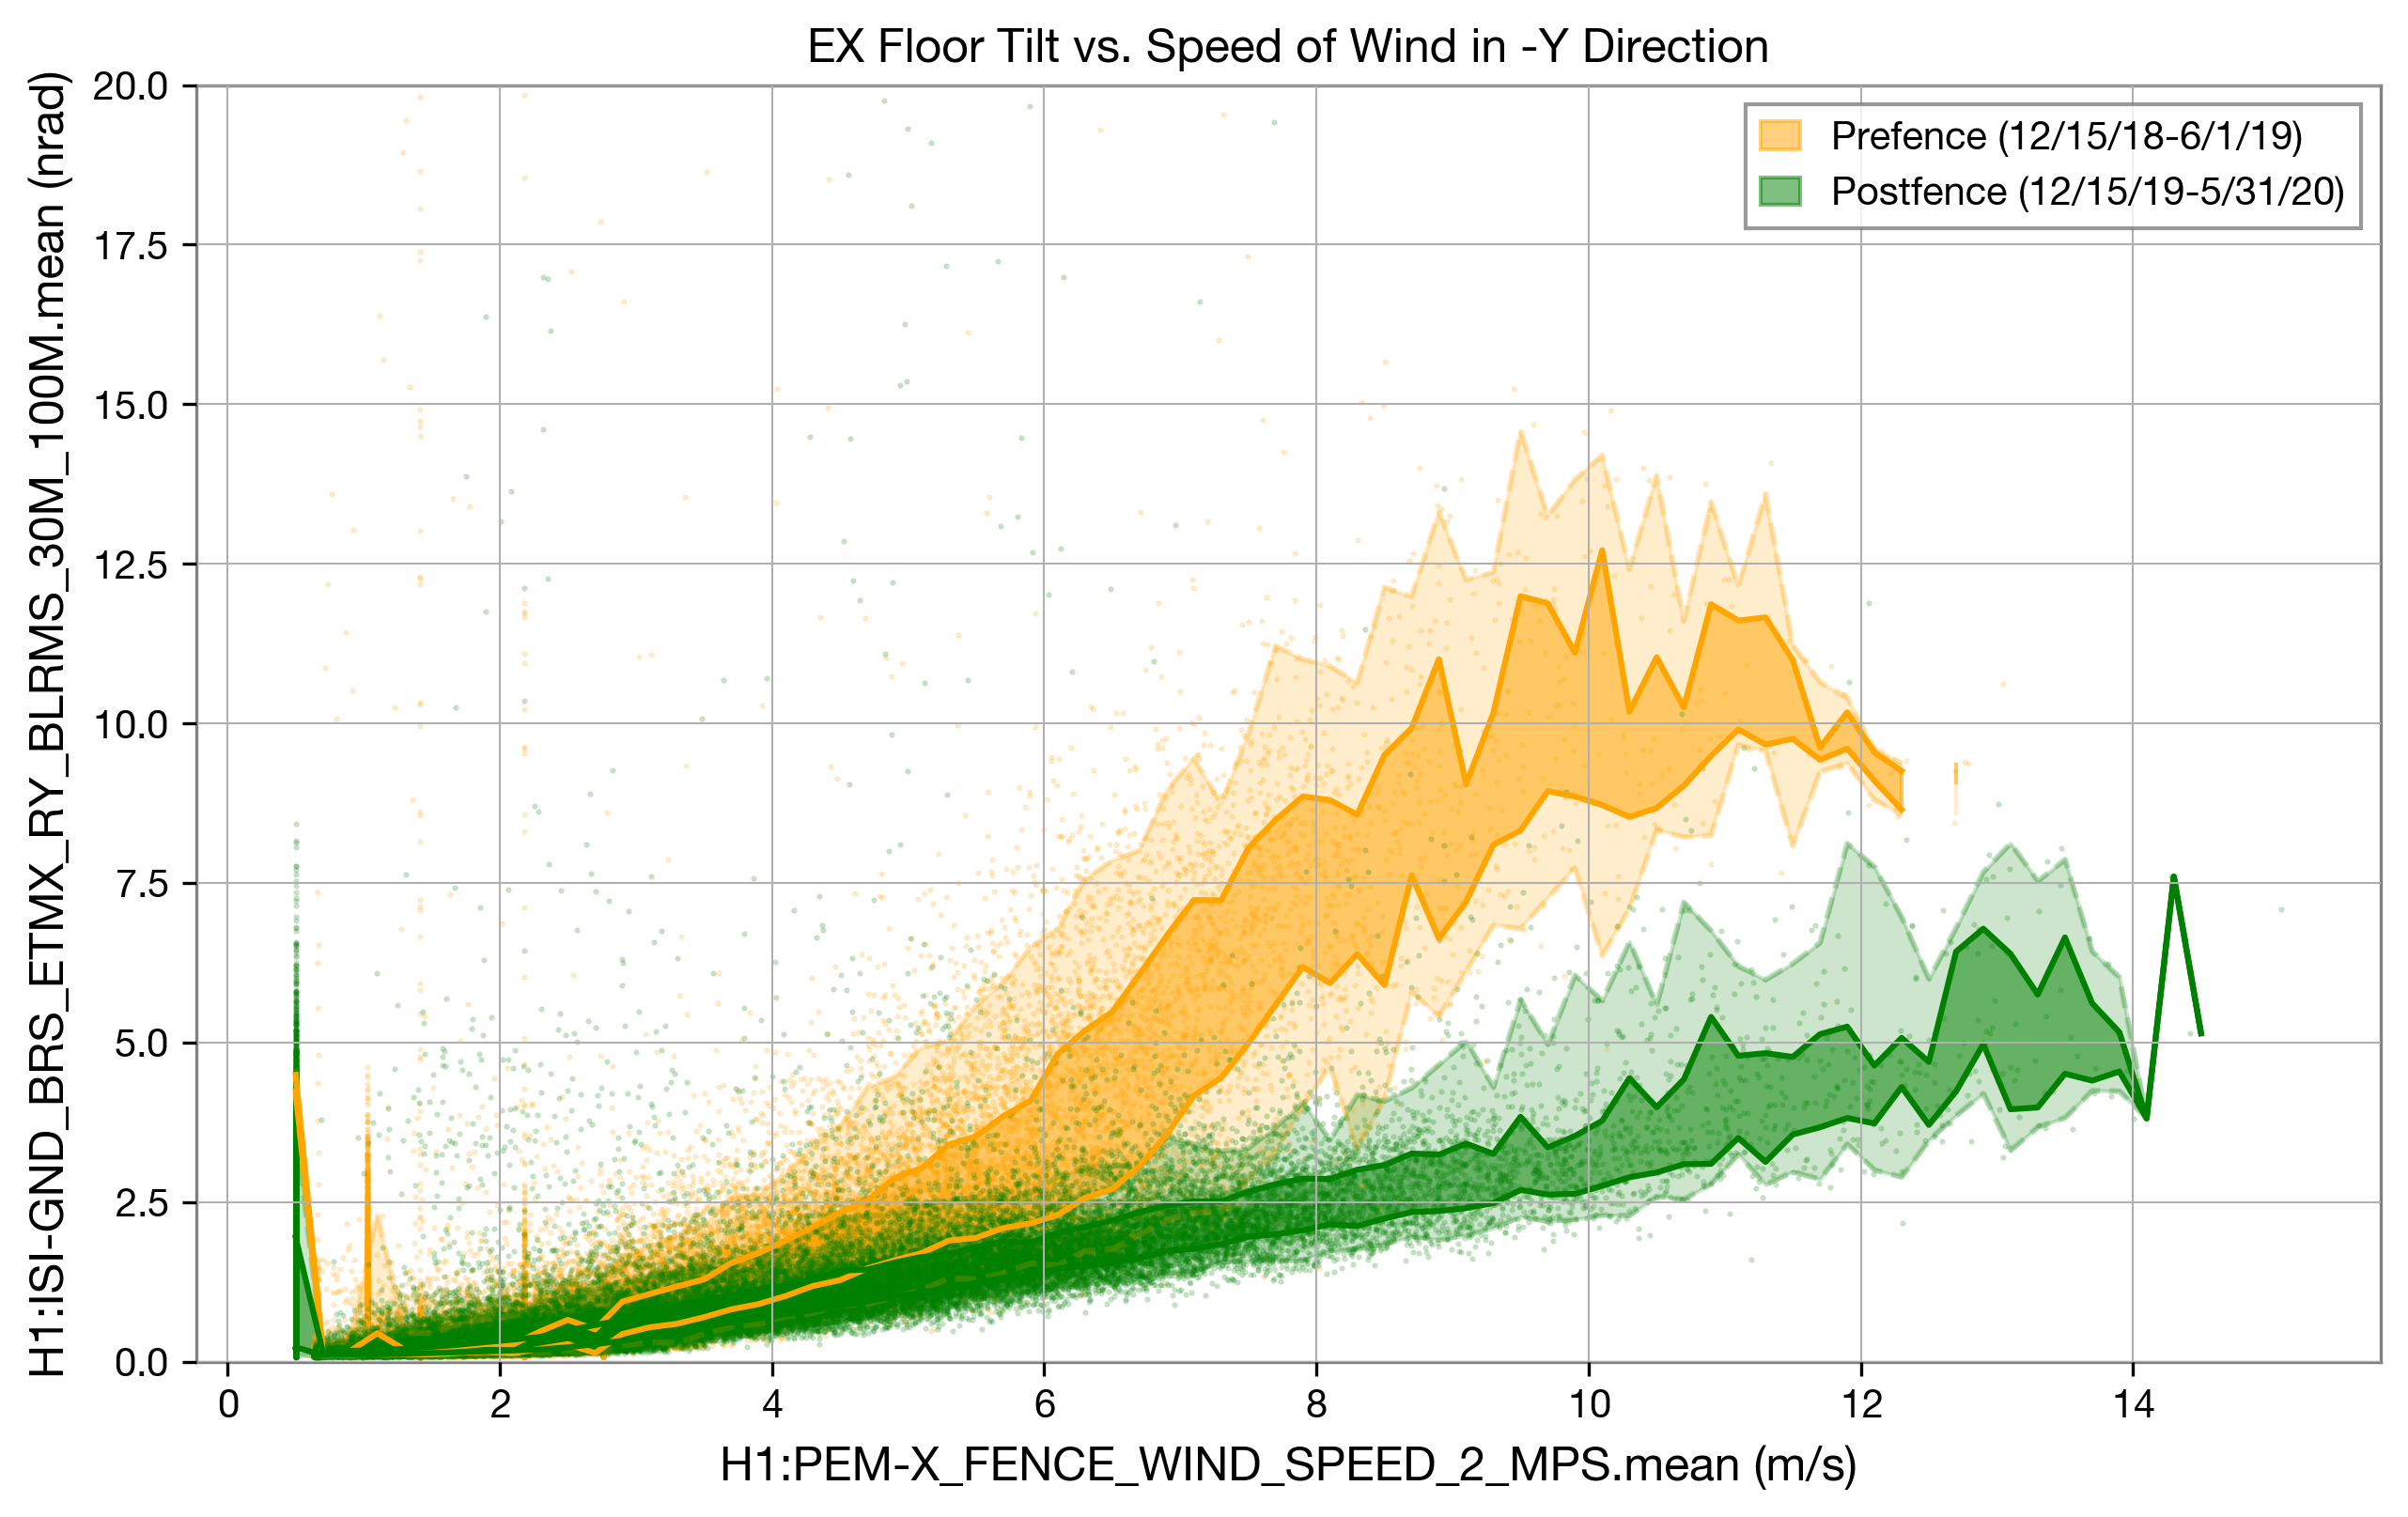

In [123]:
n = sorted(set(EXSpeedDirFiltered.index)&set(EXFSpeed.index))
predf = Constrain(EXFSpeed.loc[n],EXRot,starttime1,endtime1)
postdf = Constrain(EXFSpeed.loc[n],EXRot,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]


blist1 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.05) for b in blist1]
Phigh1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.95) for b in blist1]

blist2 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.05) for b in blist2]
Phigh2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.95) for b in blist2]

plt.plot(blist1,Plow1, '--',color='orange',alpha=.2)
plt.plot(blist1,Phigh1,'--', color='orange',alpha=.2)
plt.plot(blist2,Plow2,'--' ,color='green',alpha=.2)
plt.plot(blist2,Phigh2,'--' ,color='green',alpha=.2)

blist3 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.25) for b in blist1]
Phigh3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.75) for b in blist1]

blist4 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.25) for b in blist2]
Phigh4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.75) for b in blist2]

plt.plot(blist3,Plow3,color='orange')
plt.plot(blist3,Phigh3, color='orange')
plt.plot(blist4,Plow4 ,color='green')
plt.plot(blist4,Phigh4 ,color='green')



plt.fill_between(blist1, Plow1, Phigh1, color = "orange",alpha=.2)
plt.fill_between(blist2, Plow2, Phigh2, color = "green", alpha=.2)
plt.fill_between(blist1, Plow3, Phigh3, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)" )
plt.fill_between(blist2, Plow4, Phigh4, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)")
plt.legend()

plt.scatter(X1,Y1, color = "orange",alpha=.25,s=.2)
plt.scatter(X2,Y2, color = "green",alpha=.25,s=.2)

plt.ylim(0,20)

plt.xlabel(X1.name + ' (m/s)')
plt.ylabel(Y1.name + ' (nrad)' )
plt.title("EX Floor Tilt vs. Speed of Wind in -Y Direction")

Text(0.5, 1.0, 'EX Floor Tilt vs. Speed of Wind in Other Directions')

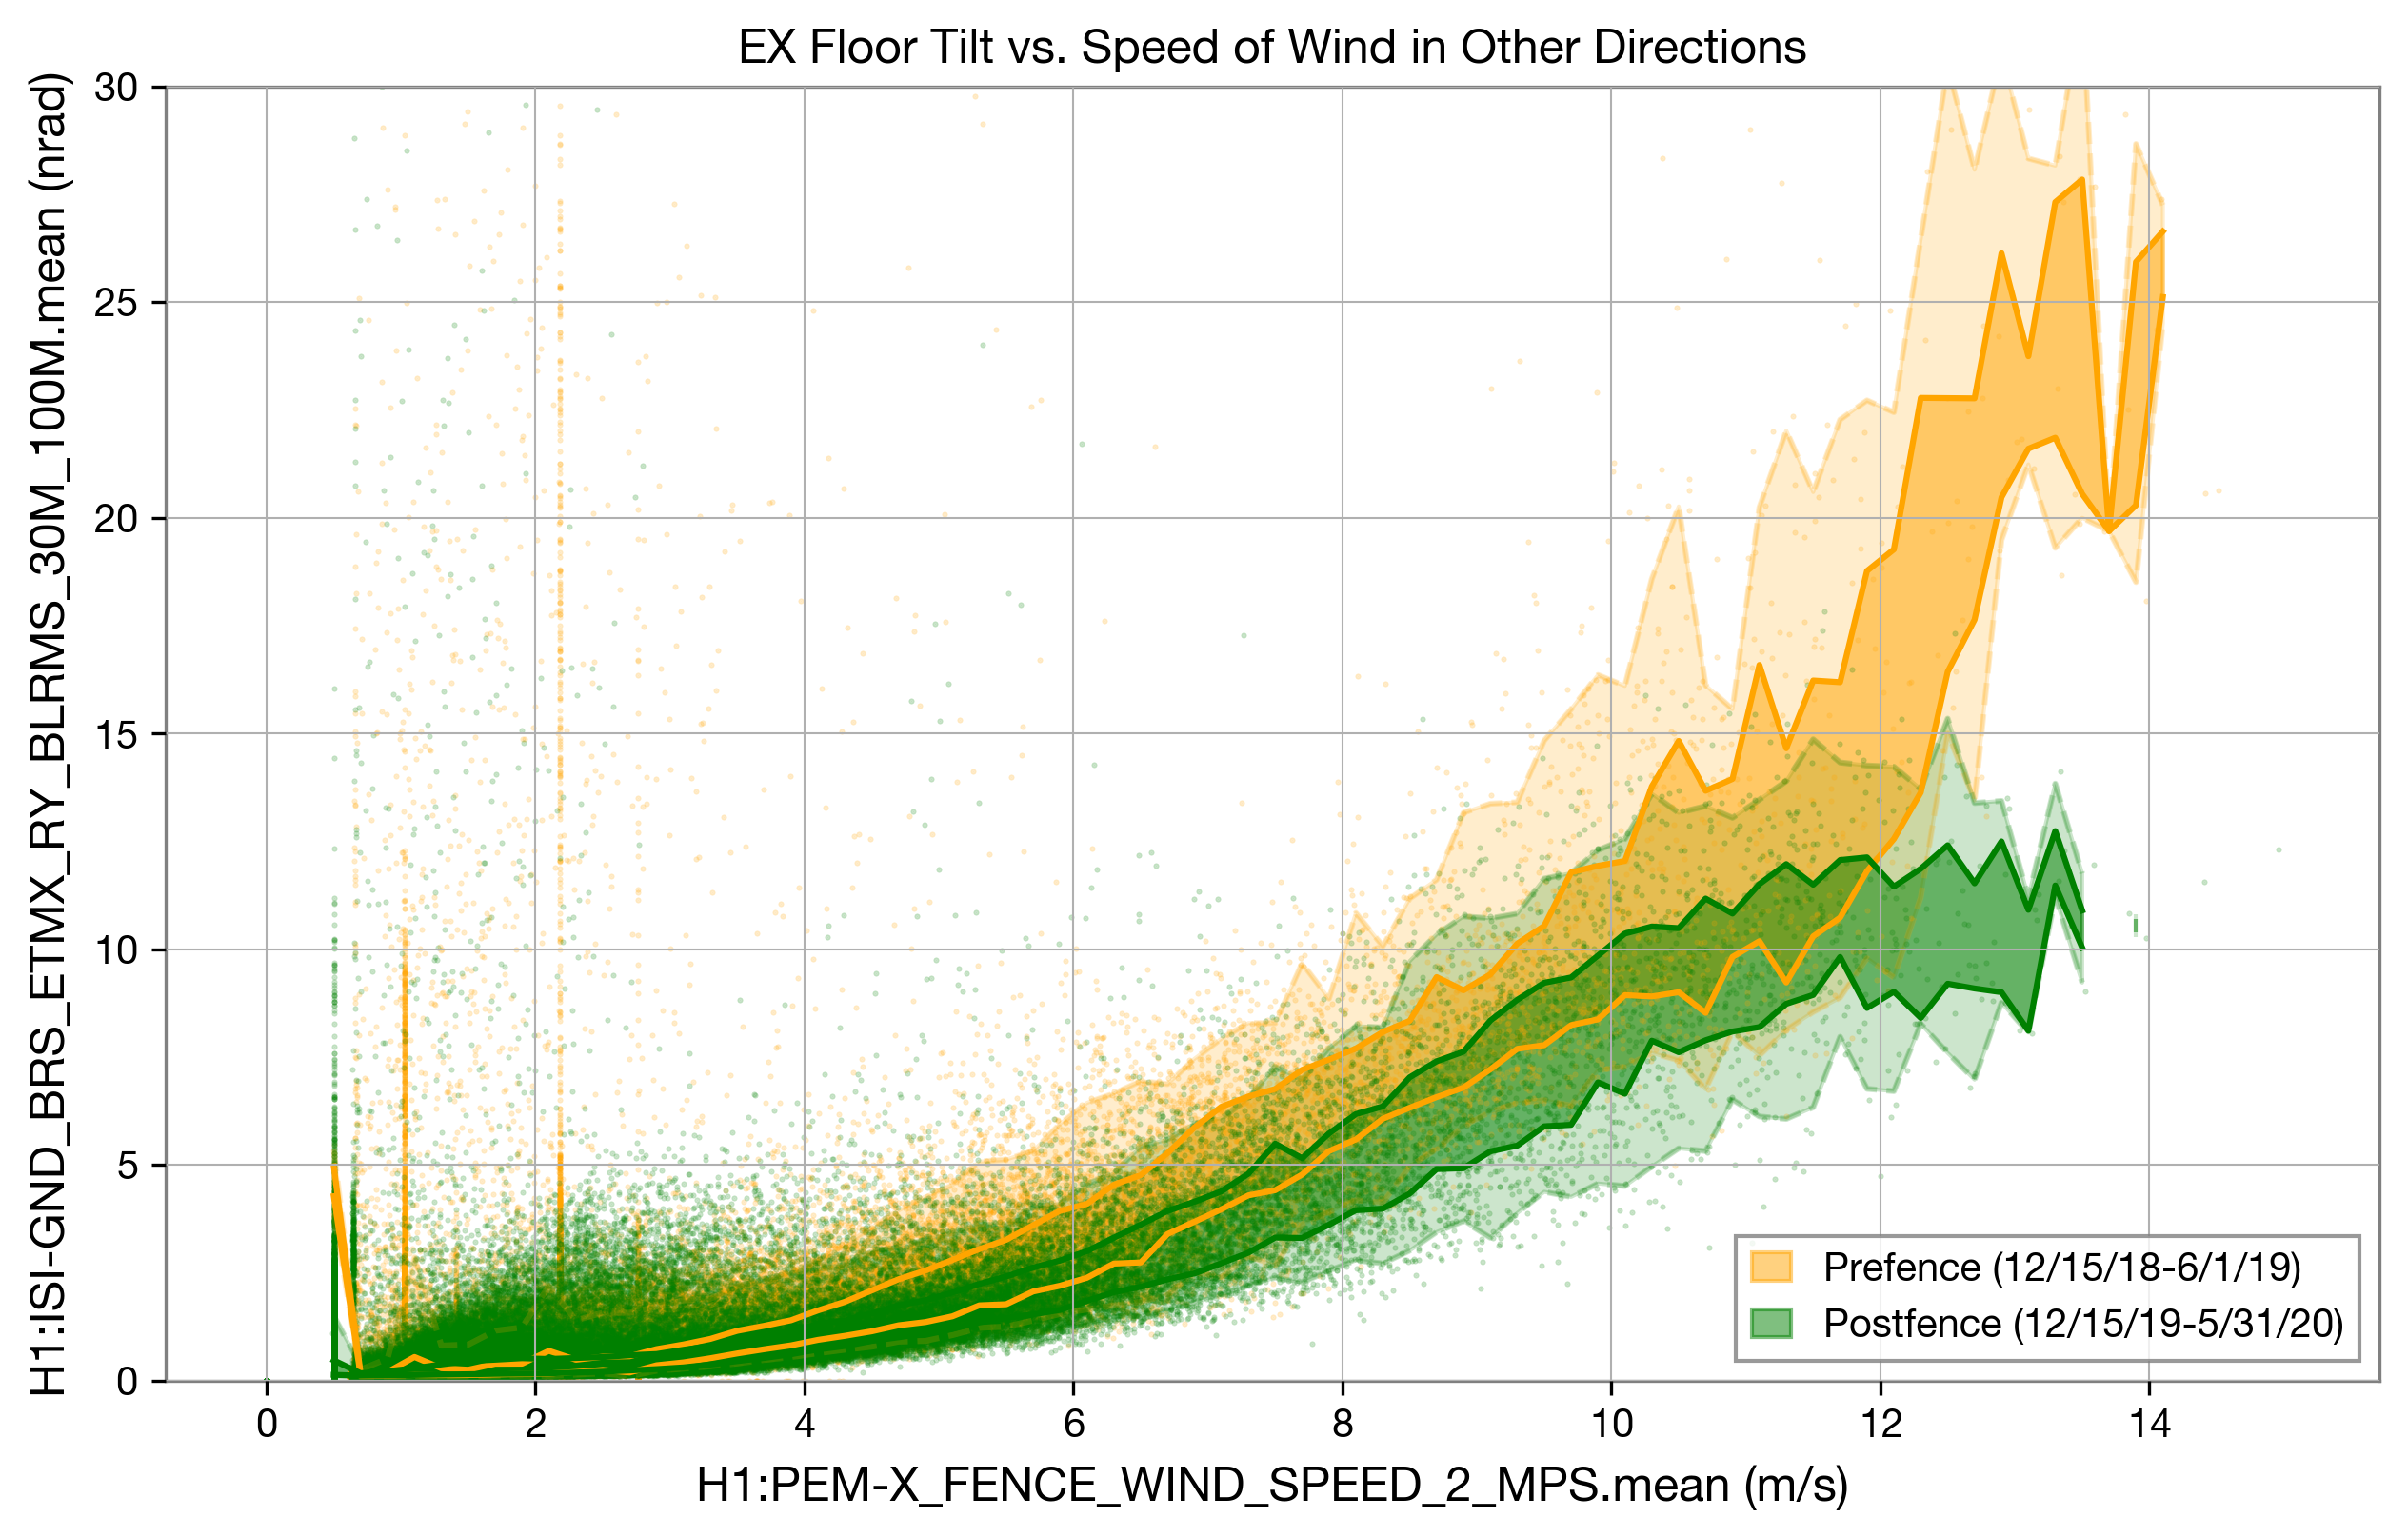

In [38]:
n = sorted(set(EXSpeedOtherDir.index)&set(EXFSpeed.index))
predf = Constrain(EXFSpeed.loc[n],EXRot,starttime1,endtime1)
postdf = Constrain(EXFSpeed.loc[n],EXRot,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]


blist1 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.05) for b in blist1]
Phigh1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.95) for b in blist1]

blist2 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.05) for b in blist2]
Phigh2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.95) for b in blist2]

plt.plot(blist1,Plow1, '--',color='orange',alpha=.2)
plt.plot(blist1,Phigh1,'--', color='orange',alpha=.2)
plt.plot(blist2,Plow2,'--' ,color='green',alpha=.2)
plt.plot(blist2,Phigh2,'--' ,color='green',alpha=.2)

blist3 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.25) for b in blist1]
Phigh3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.75) for b in blist1]

blist4 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.25) for b in blist2]
Phigh4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.75) for b in blist2]

plt.plot(blist3,Plow3,color='orange')
plt.plot(blist3,Phigh3, color='orange')
plt.plot(blist4,Plow4 ,color='green')
plt.plot(blist4,Phigh4 ,color='green')



plt.fill_between(blist1, Plow1, Phigh1, color = "orange",alpha=.2)
plt.fill_between(blist2, Plow2, Phigh2, color = "green", alpha=.2)
plt.fill_between(blist1, Plow3, Phigh3, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)" )
plt.fill_between(blist2, Plow4, Phigh4, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)")
plt.legend()

plt.scatter(X1,Y1, color = "orange",alpha=.25,s=.2)
plt.scatter(X2,Y2, color = "green",alpha=.25,s=.2)

plt.ylim(0,30)

plt.xlabel(X1.name + ' (m/s)')
plt.ylabel(Y1.name + ' (nrad)' )
plt.title("EX Floor Tilt vs. Speed of Wind in Other Directions")

Text(0.5, 1.0, 'EX Floor Tilt vs. Speed of Wind in -X Direction')

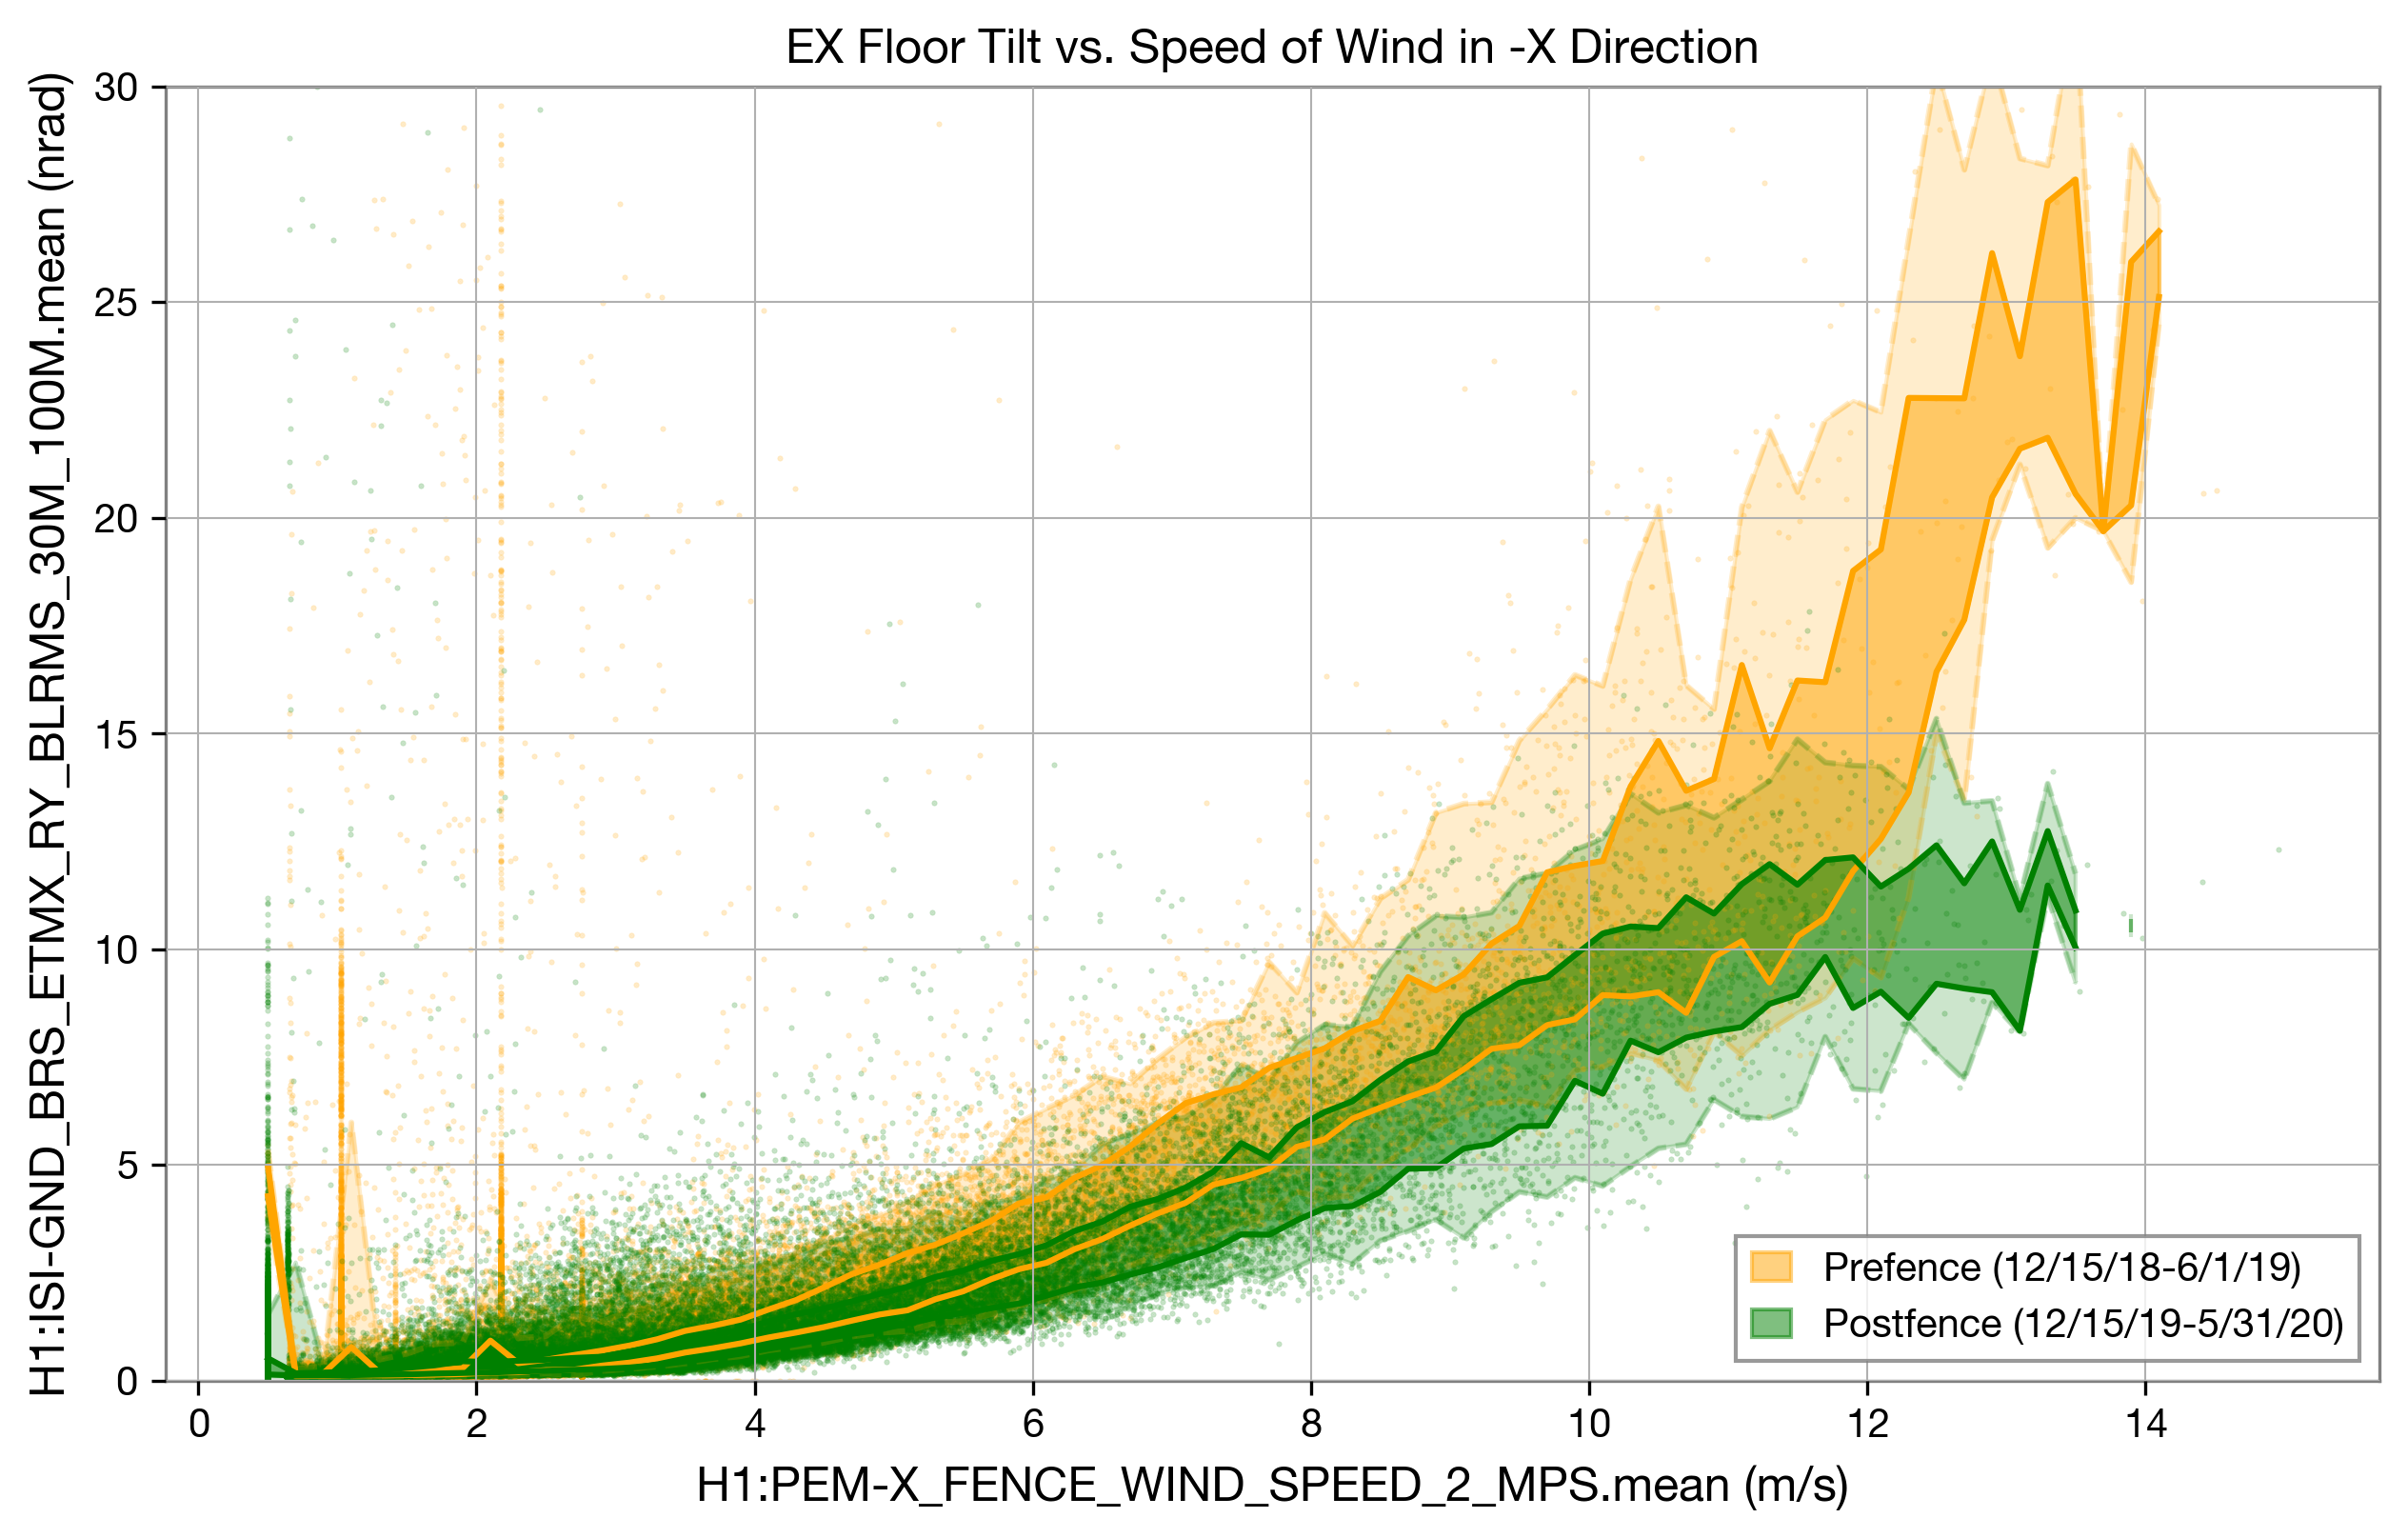

In [66]:
n = sorted(set(EXSpeedDirNX.index)&set(EXFSpeed.index))
predf = Constrain(EXFSpeed.loc[n],EXRot,starttime1,endtime1)
postdf = Constrain(EXFSpeed.loc[n],EXRot,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]


blist1 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.05) for b in blist1]
Phigh1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.95) for b in blist1]

blist2 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.05) for b in blist2]
Phigh2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.95) for b in blist2]

plt.plot(blist1,Plow1, '--',color='orange',alpha=.2)
plt.plot(blist1,Phigh1,'--', color='orange',alpha=.2)
plt.plot(blist2,Plow2,'--' ,color='green',alpha=.2)
plt.plot(blist2,Phigh2,'--' ,color='green',alpha=.2)

blist3 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.25) for b in blist1]
Phigh3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.75) for b in blist1]

blist4 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.25) for b in blist2]
Phigh4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.75) for b in blist2]

plt.plot(blist3,Plow3,color='orange')
plt.plot(blist3,Phigh3, color='orange')
plt.plot(blist4,Plow4 ,color='green')
plt.plot(blist4,Phigh4 ,color='green')



plt.fill_between(blist1, Plow1, Phigh1, color = "orange",alpha=.2)
plt.fill_between(blist2, Plow2, Phigh2, color = "green", alpha=.2)
plt.fill_between(blist1, Plow3, Phigh3, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)" )
plt.fill_between(blist2, Plow4, Phigh4, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)")
plt.legend()

plt.scatter(X1,Y1, color = "orange",alpha=.25,s=.2)
plt.scatter(X2,Y2, color = "green",alpha=.25,s=.2)

plt.ylim(0,30)

plt.xlabel(X1.name + ' (m/s)')
plt.ylabel(Y1.name + ' (nrad)' )
plt.title("EX Floor Tilt vs. Speed of Wind in -X Direction")

Why is there still a benefit for wind in other directions?

Text(0.5, 1.0, 'EX Y Axis Motion vs. Speed of Wind in -Y Direction')

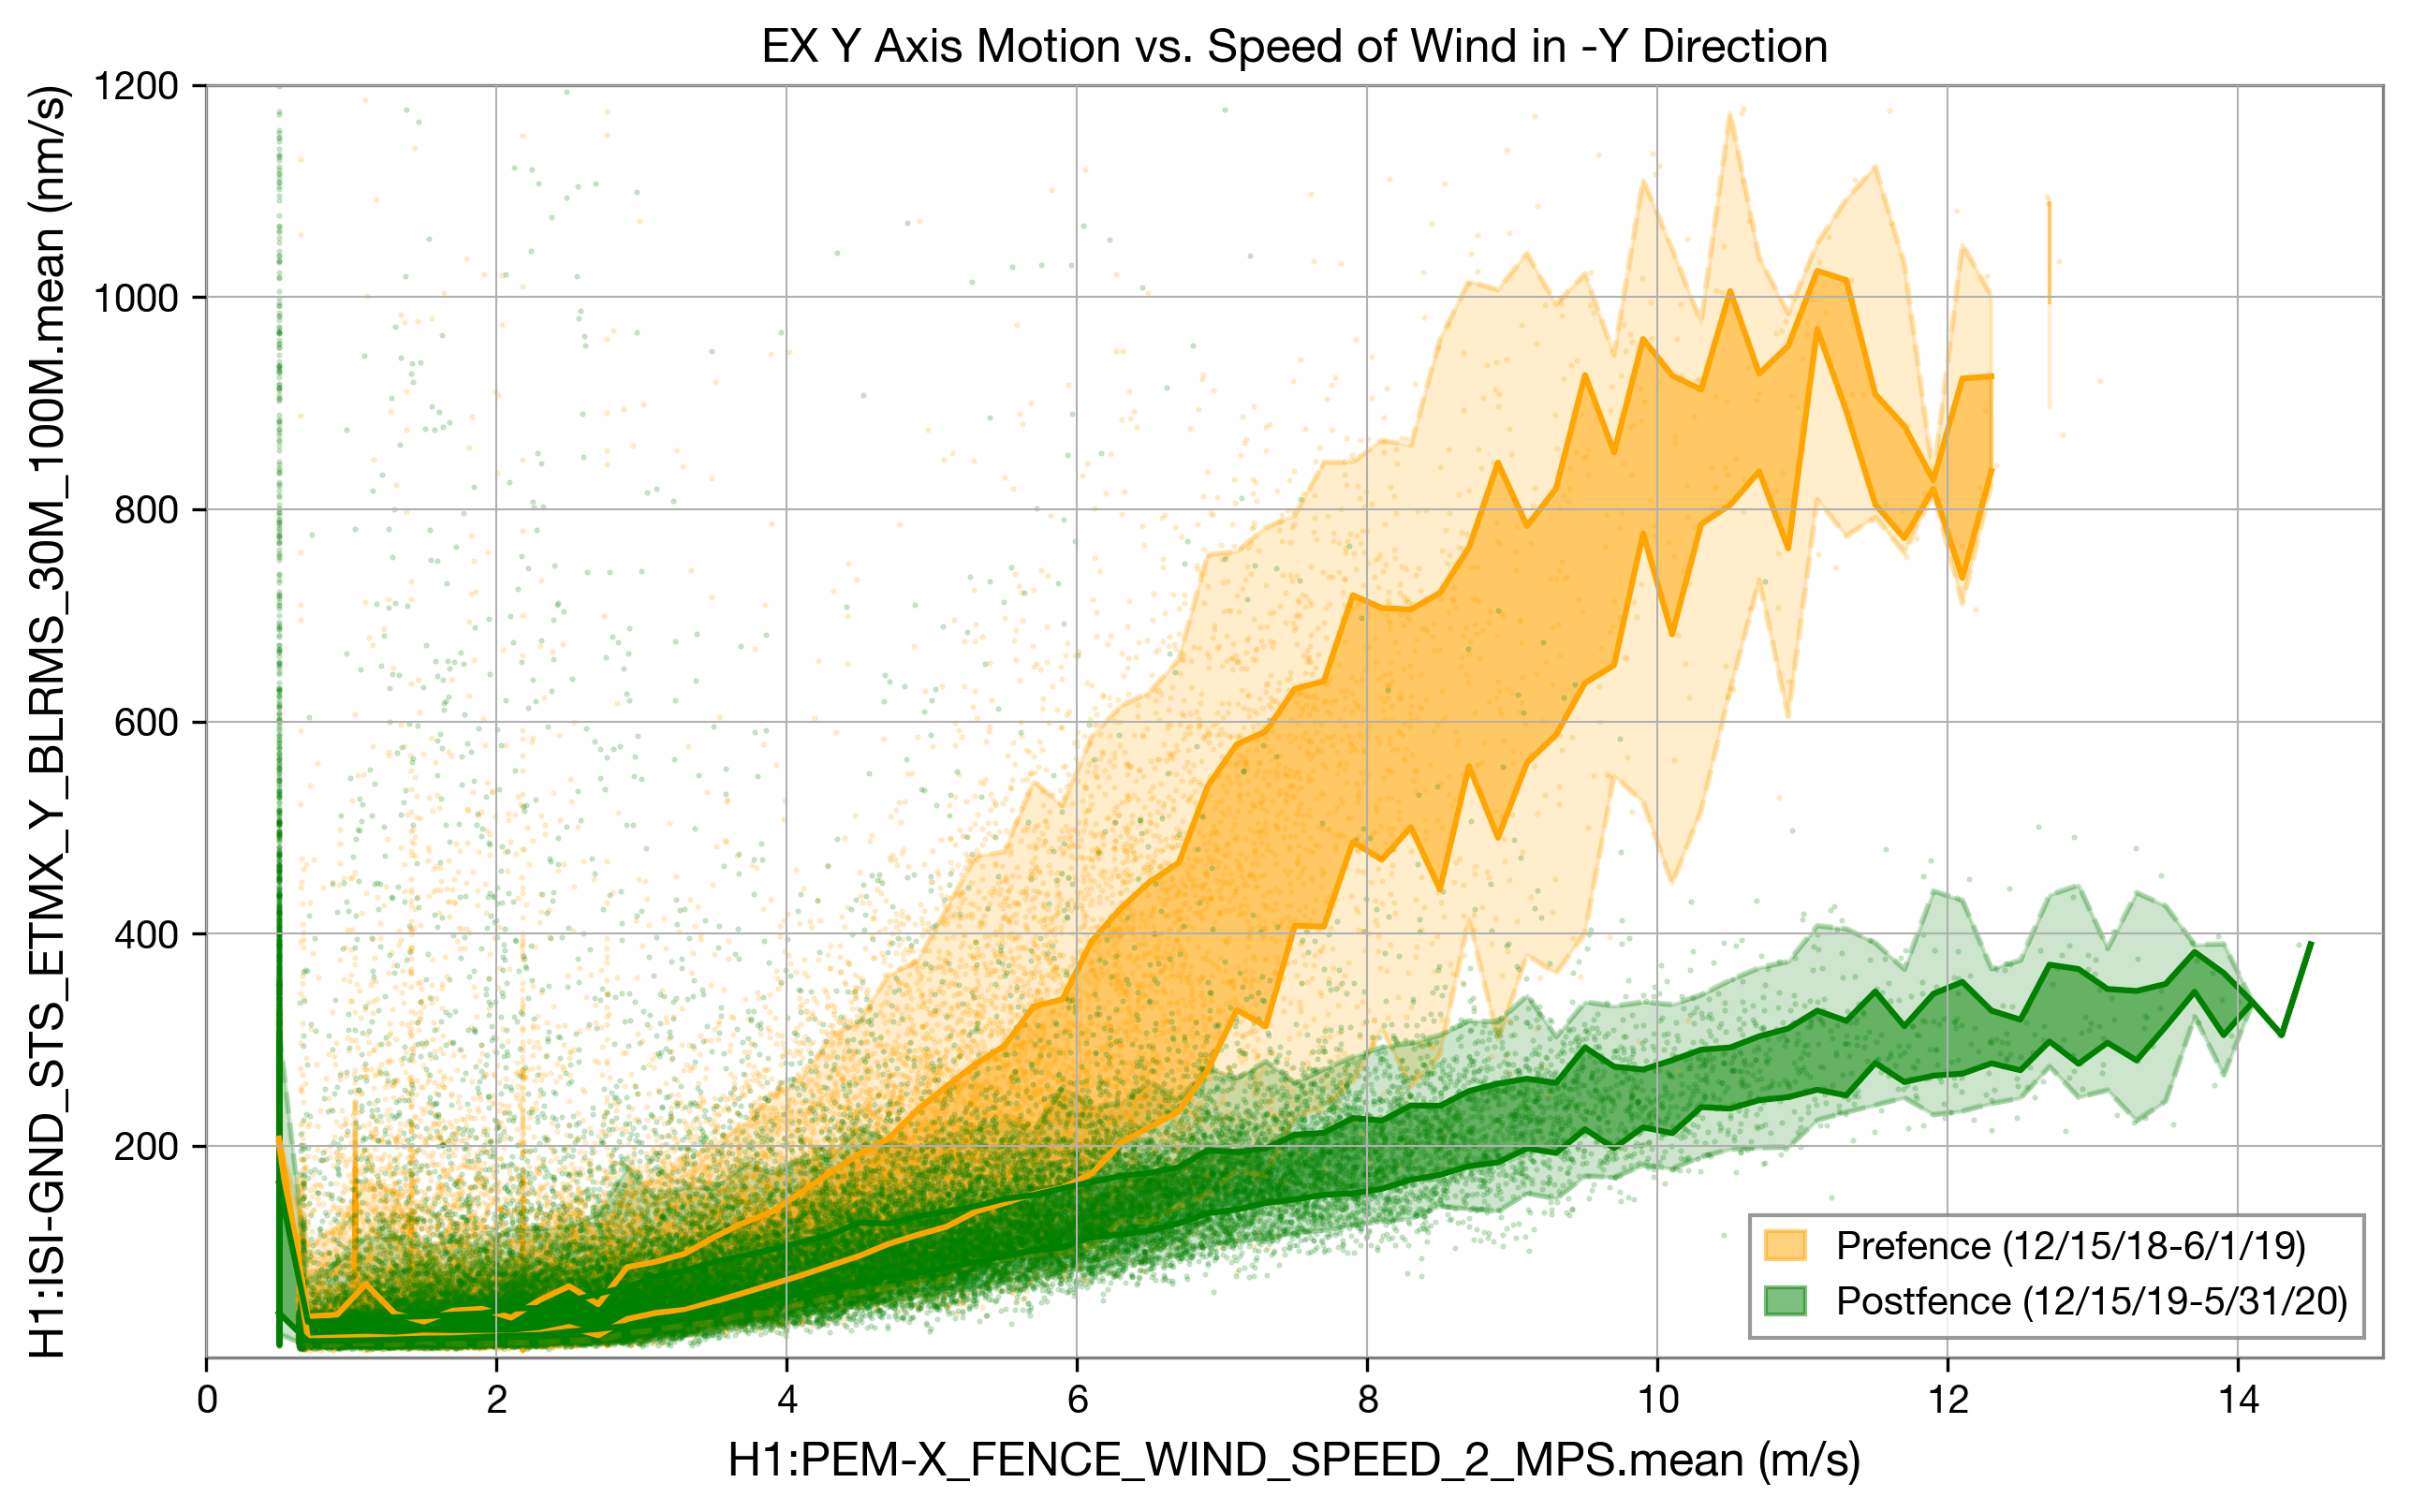

In [114]:
n = sorted(set(EXSpeedDirFiltered.index)&set(EXFSpeed.index))
predf = Constrain(EXFSpeed.loc[n],STS_Y,starttime1,endtime1)
postdf = Constrain(EXFSpeed.loc[n],STS_Y,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]


blist1 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.05) for b in blist1]
Phigh1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.95) for b in blist1]

blist2 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.05) for b in blist2]
Phigh2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.95) for b in blist2]

plt.plot(blist1,Plow1, '--',color='orange',alpha=.2)
plt.plot(blist1,Phigh1,'--', color='orange',alpha=.2)
plt.plot(blist2,Plow2,'--' ,color='green',alpha=.2)
plt.plot(blist2,Phigh2,'--' ,color='green',alpha=.2)

blist3 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.25) for b in blist1]
Phigh3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.75) for b in blist1]

blist4 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.25) for b in blist2]
Phigh4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.75) for b in blist2]

plt.plot(blist3,Plow3,color='orange')
plt.plot(blist3,Phigh3, color='orange')
plt.plot(blist4,Plow4 ,color='green')
plt.plot(blist4,Phigh4 ,color='green')



plt.fill_between(blist1, Plow1, Phigh1, color = "orange",alpha=.2)
plt.fill_between(blist2, Plow2, Phigh2, color = "green", alpha=.2)
plt.fill_between(blist1, Plow3, Phigh3, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)" )
plt.fill_between(blist2, Plow4, Phigh4, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)")
plt.legend()

plt.scatter(X1,Y1, color = "orange",alpha=.25,s=.2)
plt.scatter(X2,Y2, color = "green",alpha=.25,s=.2)

#plt.yscale('log')
plt.ylim(1,1200)
plt.xlim(0,15)


plt.xlabel(X1.name + ' (m/s)')
plt.ylabel(Y1.name + ' (nm/s)' )
plt.title("EX Y Axis Motion vs. Speed of Wind in -Y Direction")

Text(0.5, 1.0, 'EX Y Axis Motion vs. Speed of Wind in Other Directions')

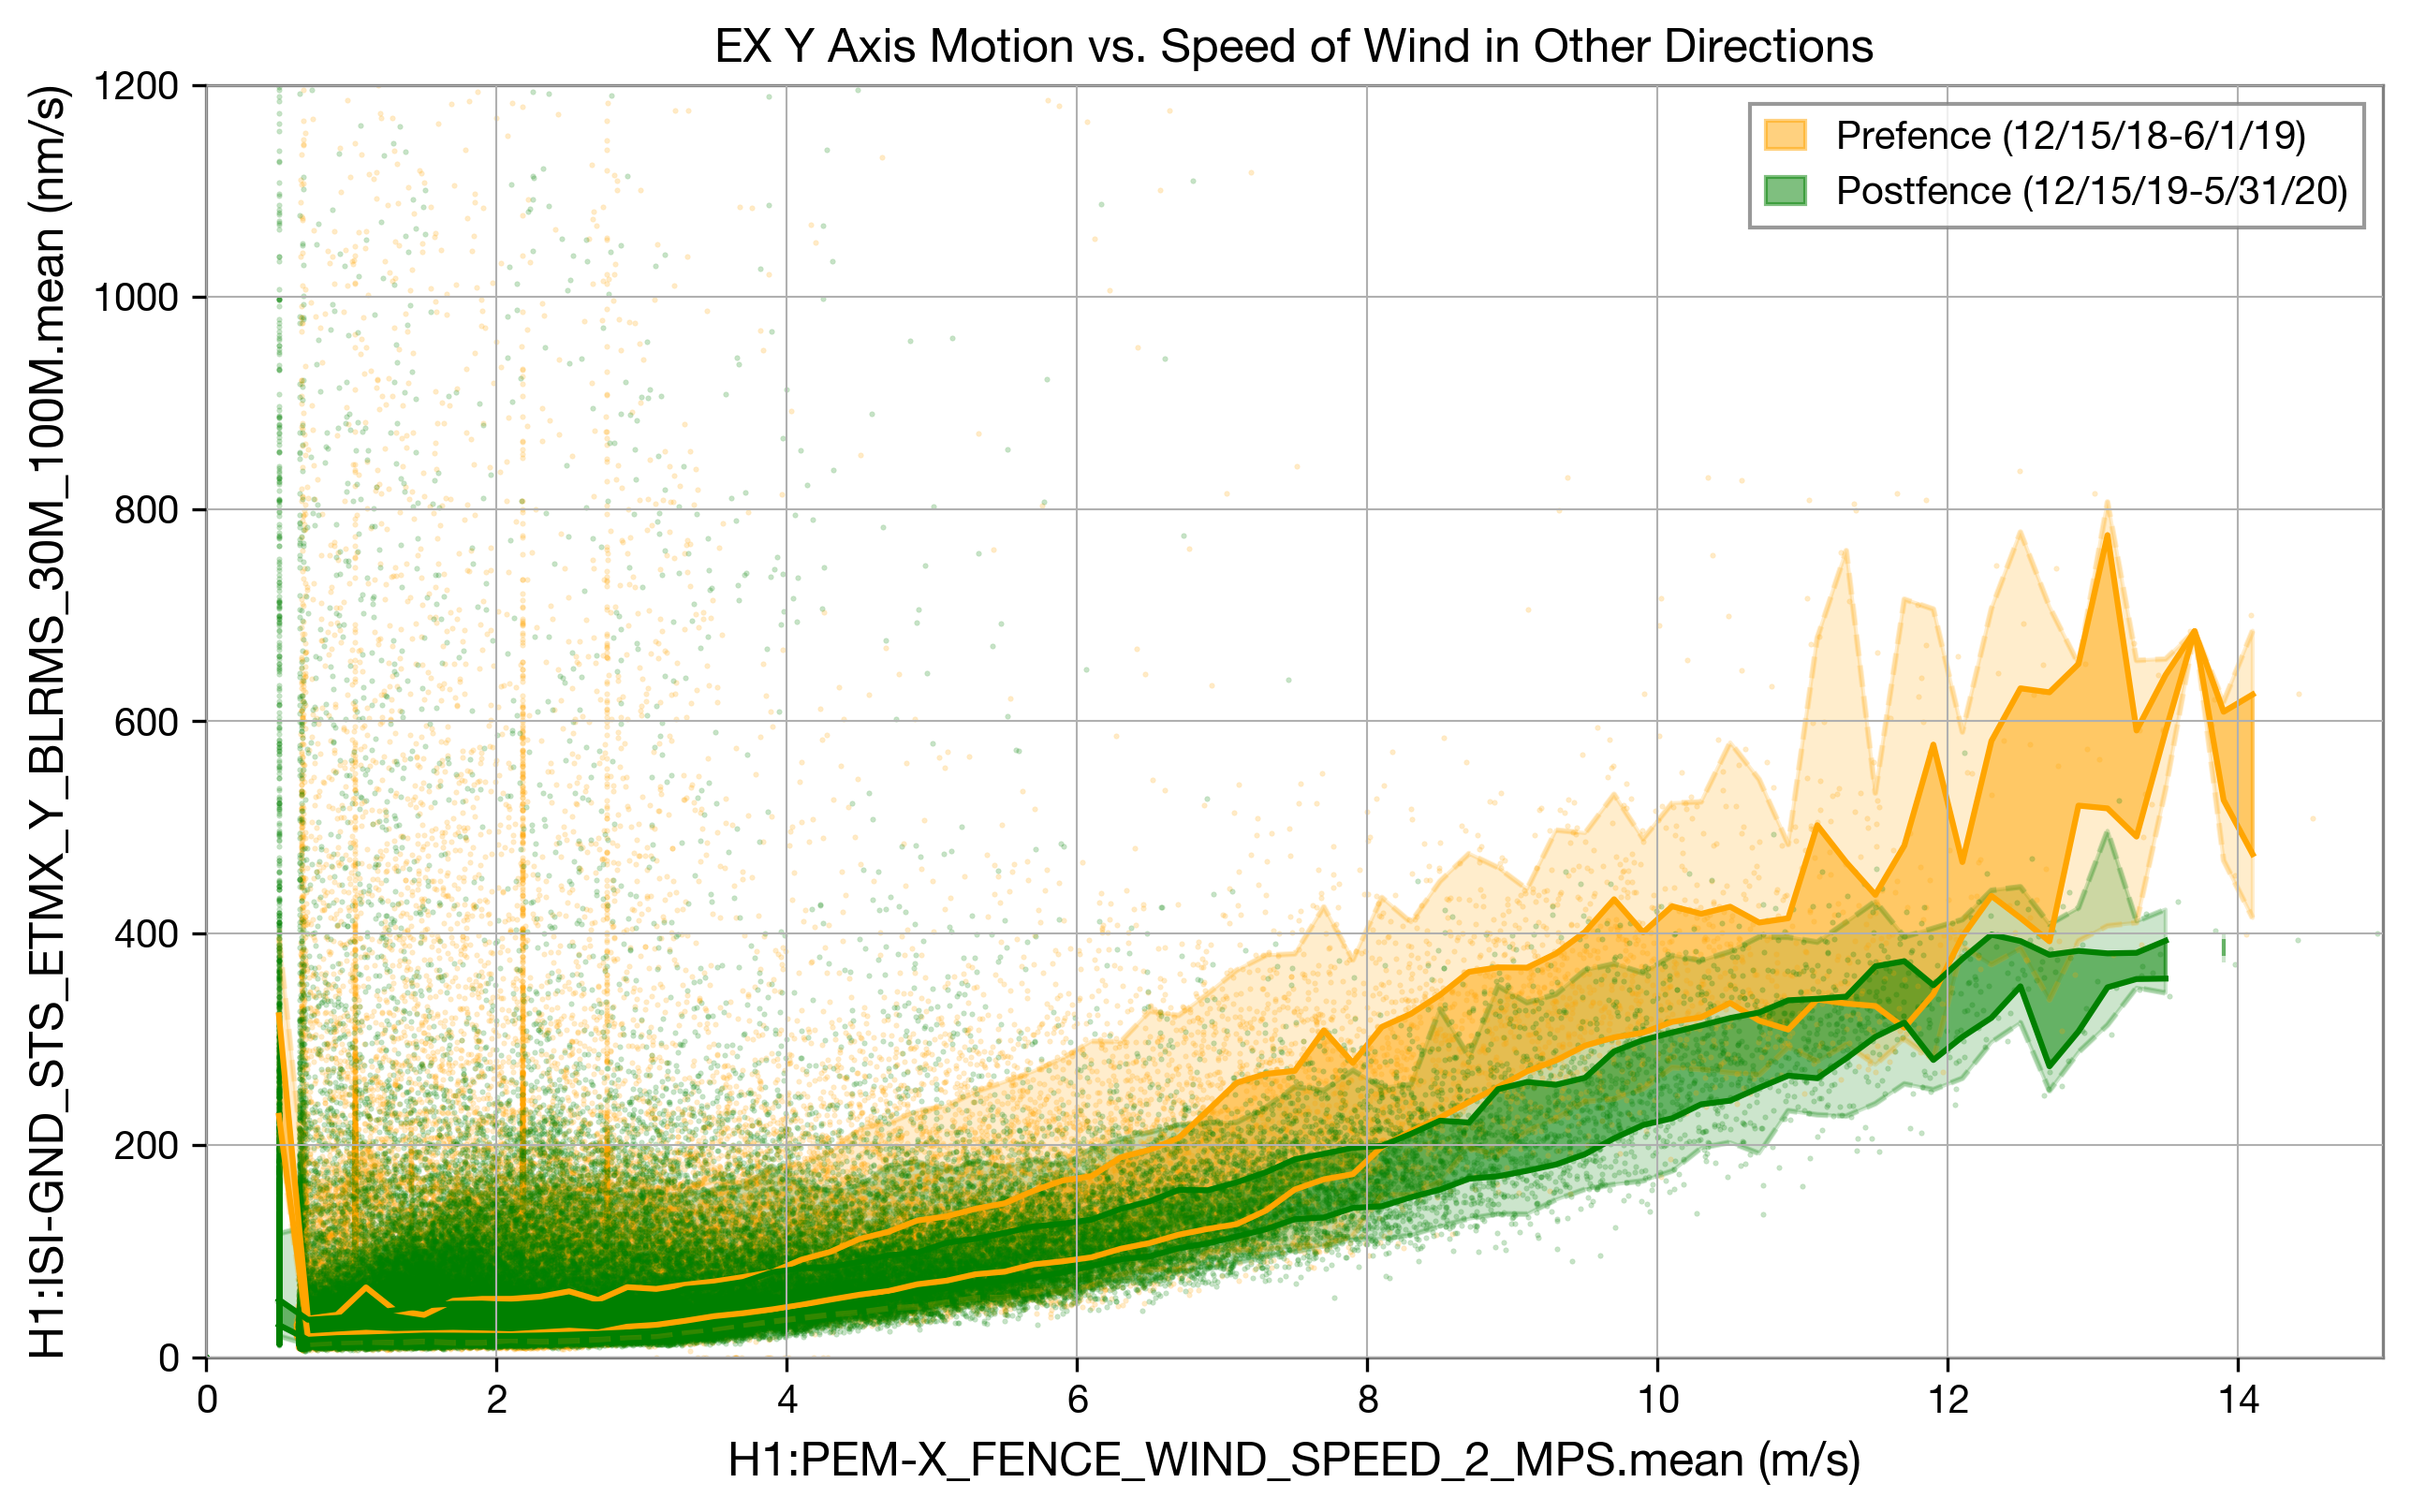

In [122]:
n = sorted(set(EXSpeedOtherDir.index)&set(EXFSpeed.index))
predf = Constrain(EXFSpeed.loc[n],STS_Y,starttime1,endtime1)
postdf = Constrain(EXFSpeed.loc[n],STS_Y,starttime2,endtime2)

X1=predf.iloc[:,0]
Y1=predf.iloc[:,1]
X2=postdf.iloc[:,0]
Y2=postdf.iloc[:,1]


blist1 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.05) for b in blist1]
Phigh1 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.95) for b in blist1]

blist2 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.05) for b in blist2]
Phigh2 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.95) for b in blist2]

plt.plot(blist1,Plow1, '--',color='orange',alpha=.2)
plt.plot(blist1,Phigh1,'--', color='orange',alpha=.2)
plt.plot(blist2,Plow2,'--' ,color='green',alpha=.2)
plt.plot(blist2,Phigh2,'--' ,color='green',alpha=.2)

blist3 = [(1+i*2)/10 for i in range (int(X1.max()/.2))]
Plow3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.25) for b in blist1]
Phigh3 = [Y1.loc[(X1>=b-.1)&(X1<b+.1)].quantile(.75) for b in blist1]

blist4 = [(1+i*2)/10 for i in range (int(X2.max()/.2))]
Plow4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.25) for b in blist2]
Phigh4 = [Y2.loc[(X2>=b-.1)&(X2<b+.1)].quantile(.75) for b in blist2]

plt.plot(blist3,Plow3,color='orange')
plt.plot(blist3,Phigh3, color='orange')
plt.plot(blist4,Plow4 ,color='green')
plt.plot(blist4,Phigh4 ,color='green')



plt.fill_between(blist1, Plow1, Phigh1, color = "orange",alpha=.2)
plt.fill_between(blist2, Plow2, Phigh2, color = "green", alpha=.2)
plt.fill_between(blist1, Plow3, Phigh3, color = "orange",alpha=.5,label="Prefence (12/15/18-6/1/19)" )
plt.fill_between(blist2, Plow4, Phigh4, color = "green",alpha=.5,label="Postfence (12/15/19-5/31/20)")
plt.legend()

plt.scatter(X1,Y1, color = "orange",alpha=.25,s=.2)
plt.scatter(X2,Y2, color = "green",alpha=.25,s=.2)

#plt.yscale('log')
plt.ylim(0,1200)
plt.xlim(0,15)

plt.xlabel(X1.name + ' (m/s)')
plt.ylabel(Y1.name + ' (nm/s)' )
plt.title("EX Y Axis Motion vs. Speed of Wind in Other Directions")